### Problem Statement
To develop a ML model to predict the price of houses by taking the house details as input and house price as output.

In [3]:
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from scipy.stats import iqr, stats
import stat

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
data = pd.read_csv('Processed_Housing_data.csv')


In [38]:
data = data[['SaleDate','LandUse','SoldAsVacant','Acreage','TaxDistrict','LandValue','BuildingValue','TotalValue','YearBuilt','Bedrooms','FullBath','HalfBath','SalePrice']]
data.head()

,SaleDate,LandUse,SoldAsVacant,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SalePrice
0,8/21/2015,SINGLE FAMILY,No,0.17,URBAN SERVICES DISTRICT,18200.0,64600.0,82800.0,1928.0,2.0,1.0,0.0,105000.0
1,12/15/2015,SINGLE FAMILY,No,0.18,URBAN SERVICES DISTRICT,13000.0,107800.0,120800.0,1975.0,2.0,1.0,1.0,120000.0
2,1/9/2015,SINGLE FAMILY,No,0.14,URBAN SERVICES DISTRICT,80000.0,226600.0,306600.0,2014.0,3.0,3.0,1.0,407500.0
3,5/25/2016,SINGLE FAMILY,No,0.95,GENERAL SERVICES DISTRICT,50000.0,157400.0,207400.0,1988.0,3.0,2.0,0.0,235000.0
4,12/28/2015,DUPLEX,No,0.09,GENERAL SERVICES DISTRICT,17000.0,64100.0,81100.0,1933.0,6.0,2.0,0.0,140000.0


In [39]:
data.isnull().sum()

SaleDate         0
LandUse          0
SoldAsVacant     0
Acreage          0
TaxDistrict      0
LandValue        0
BuildingValue    0
TotalValue       0
YearBuilt        0
Bedrooms         0
FullBath         0
HalfBath         0
SalePrice        0
dtype: int64

In [40]:
data.shape

(23705, 13)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SaleDate       23705 non-null  object 
 1   LandUse        23705 non-null  object 
 2   SoldAsVacant   23705 non-null  object 
 3   Acreage        23705 non-null  float64
 4   TaxDistrict    23705 non-null  object 
 5   LandValue      23705 non-null  float64
 6   BuildingValue  23705 non-null  float64
 7   TotalValue     23705 non-null  float64
 8   YearBuilt      23705 non-null  float64
 9   Bedrooms       23705 non-null  float64
 10  FullBath       23705 non-null  float64
 11  HalfBath       23705 non-null  float64
 12  SalePrice      23705 non-null  float64
dtypes: float64(9), object(4)
memory usage: 2.4+ MB


In [43]:
data.drop(['SaleDate'],axis=1,inplace=True)

Lets counts the categorical variables

In [44]:
for i in data:
    if data[i].dtypes in ['object']:
        print(data[i].value_counts())
        print('****************************************')

SINGLE FAMILY                             21043
DUPLEX                                     1143
ZERO LOT LINE                               845
VACANT RESIDENTIAL LAND                     232
VACANT RES LAND                             226
TRIPLEX                                      72
RESIDENTIAL COMBO/MISC                       34
QUADPLEX                                     32
CHURCH                                       22
DORMITORY/BOARDING HOUSE                     14
SPLIT CLASS                                  12
PARSONAGE                                     5
GREENBELT                                     4
FOREST                                        3
DAY CARE CENTER                               2
APARTMENT: LOW RISE (BUILT SINCE 1960)        2
NON-PROFIT CHARITABLE SERVICE                 2
OFFICE BLDG (ONE OR TWO STORIES)              2
TERMINAL/DISTRIBUTION WAREHOUSE               2
MOBILE HOME                                   2
STRIP SHOPPING CENTER                   

In [45]:
## Descriptive statistics

data.describe()

,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SalePrice
count,23705.000000,2.370500e+04,2.370500e+04,2.370500e+04,23705.000000,23705.000000,23705.000000,23705.000000,2.370500e+04
mean,0.455836,6.904970e+04,1.730583e+05,2.447819e+05,1963.723139,3.094115,1.896984,0.286648,2.750023e+05
std,0.793932,1.021612e+05,1.935828e+05,2.723682e+05,26.385627,0.850667,0.955172,0.489565,3.044420e+05
min,0.040000,1.000000e+02,1.400000e+03,1.260000e+04,1799.000000,0.000000,0.000000,0.000000,1.000000e+02
25%,0.190000,2.200000e+04,8.390000e+04,1.098000e+05,1948.000000,3.000000,1.000000,0.000000,1.250000e+05
50%,0.270000,2.990000e+04,1.176000e+05,1.548000e+05,1960.000000,3.000000,2.000000,0.000000,1.850000e+05
75%,0.450000,6.030000e+04,1.892000e+05,2.782000e+05,1983.000000,4.000000,2.000000,1.000000,3.249000e+05
max,47.500000,1.869000e+06,5.824300e+06,6.402600e+06,2017.000000,11.000000,10.000000,3.000000,1.075000e+07


In [46]:
### Lets select Categorical variables and continuous variable 

category = []
continuous =[]

for i in data.columns:
    if data[i].dtypes in ['object']:
        category.append(i)
    else:
        continuous.append(i)

In [47]:
category

['LandUse', 'SoldAsVacant', 'TaxDistrict']

In [48]:
continuous

['Acreage',
 'LandValue',
 'BuildingValue',
 'TotalValue',
 'YearBuilt',
 'Bedrooms',
 'FullBath',
 'HalfBath',
 'SalePrice']

In [49]:
## Category

data.loc[:,category][:10]

,LandUse,SoldAsVacant,TaxDistrict
0,SINGLE FAMILY,No,URBAN SERVICES DISTRICT
1,SINGLE FAMILY,No,URBAN SERVICES DISTRICT
2,SINGLE FAMILY,No,URBAN SERVICES DISTRICT
3,SINGLE FAMILY,No,GENERAL SERVICES DISTRICT
4,DUPLEX,No,GENERAL SERVICES DISTRICT
5,SINGLE FAMILY,No,CITY OF FOREST HILLS
6,SINGLE FAMILY,No,URBAN SERVICES DISTRICT
7,DUPLEX,No,URBAN SERVICES DISTRICT
8,RESIDENTIAL COMBO/MISC,No,GENERAL SERVICES DISTRICT
9,SINGLE FAMILY,No,URBAN SERVICES DISTRICT


### Statistical Testing using Chisquare

Run test on the categorical variables to check whether a feature is predictor of price or not


In [21]:
import colorama
from colorama import Fore

LandUse:


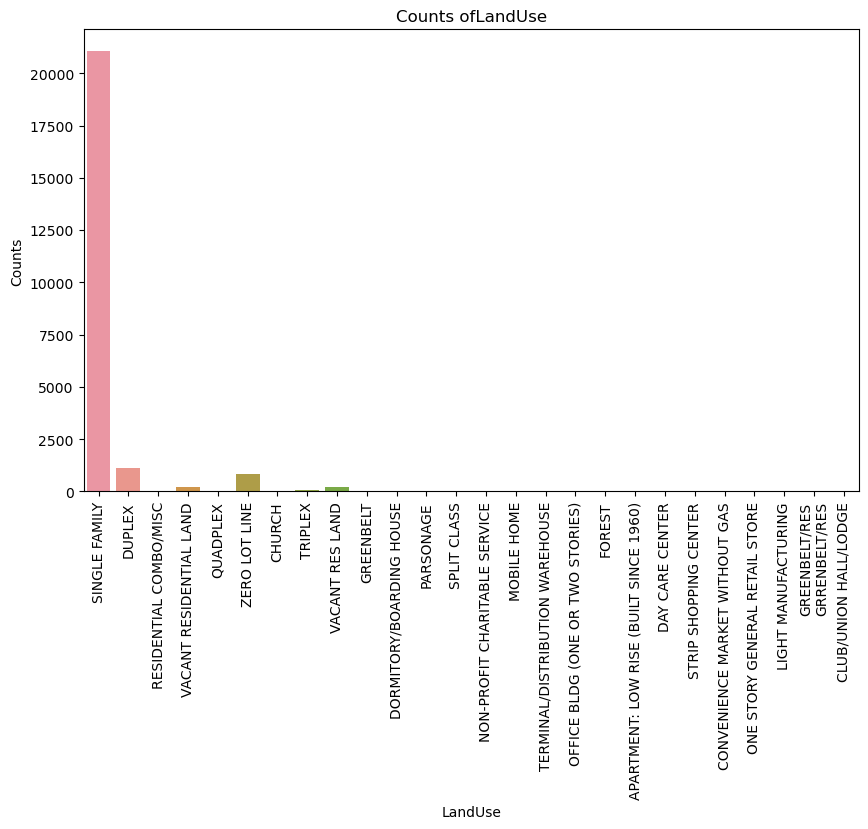

'LandUse' is bad predictor
p_val=1.0

SoldAsVacant:


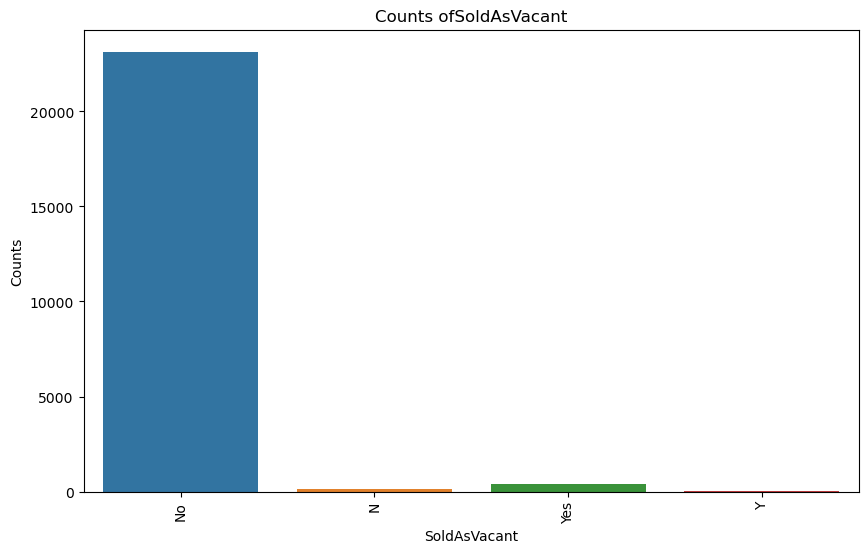

'SoldAsVacant' is Good Predictor
p_val=0.0

TaxDistrict:


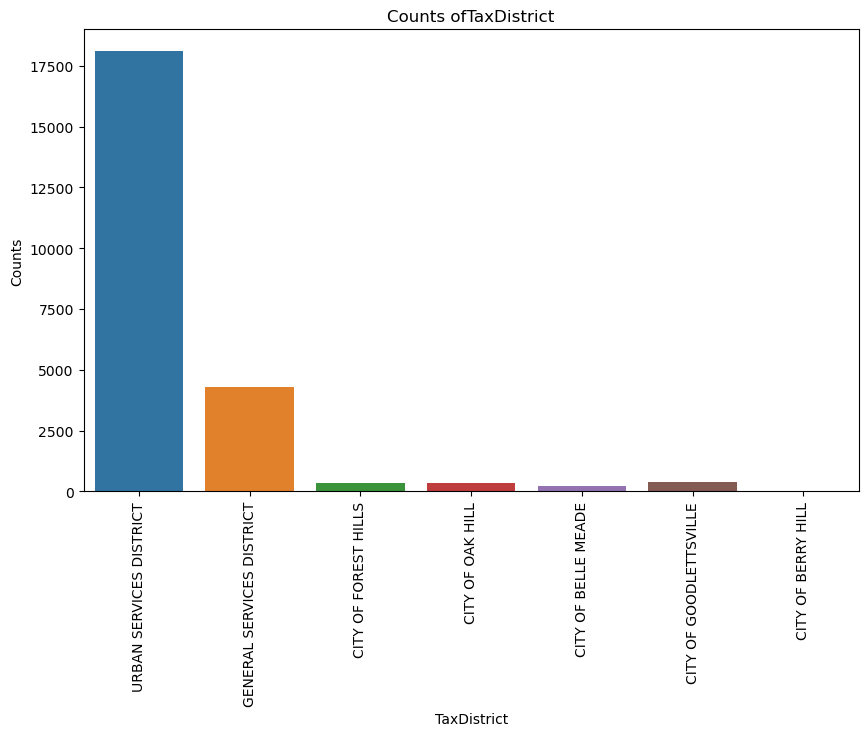

'TaxDistrict' is Good Predictor
p_val=0.0



In [52]:
for i in category:
    print(i+":")
    plt.style.use('default')
    plt.figure(figsize=(10,6))
    sns.countplot(data[i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.ylabel('Counts')
    plt.title('Counts of'+i)
    plt.show()
    
    a = np.array(pd.crosstab(data.SalePrice,data[i]))
    (stats,p,dof,_)=chi2_contingency(a,correction=False)
    
    if p>0.05:
        print(Fore.RED+ "'{}' is bad predictor".format(i))
        print('p_val={}\n'.format(p))
    else:
        print(Fore.GREEN+ "'{}' is Good Predictor".format(i))
        print('p_val={}\n'.format(p))
    
    
    

LandUse is a bad predictor of the SalePrice, therefore we can drop that column

In [53]:
data.drop(['LandUse'],axis=1,inplace=True)

#### Continuous 

In [54]:
data.loc[:,continuous]

,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SalePrice
0,0.17,18200.0,64600.0,82800.0,1928.0,2.0,1.0,0.0,105000.0
1,0.18,13000.0,107800.0,120800.0,1975.0,2.0,1.0,1.0,120000.0
2,0.14,80000.0,226600.0,306600.0,2014.0,3.0,3.0,1.0,407500.0
3,0.95,50000.0,157400.0,207400.0,1988.0,3.0,2.0,0.0,235000.0
4,0.09,17000.0,64100.0,81100.0,1933.0,6.0,2.0,0.0,140000.0
...,...,...,...,...,...,...,...,...,...
23700,0.17,25000.0,320300.0,345300.0,2014.0,4.0,2.0,1.0,445000.0
23701,1.15,50000.0,146100.0,208200.0,1965.0,5.0,2.0,0.0,320000.0
23702,0.25,20000.0,88600.0,108600.0,1946.0,3.0,2.0,0.0,118500.0
23703,0.26,121600.0,279800.0,417200.0,2006.0,2.0,2.0,2.0,616000.0


lets drop SaleDate column

Acreage:


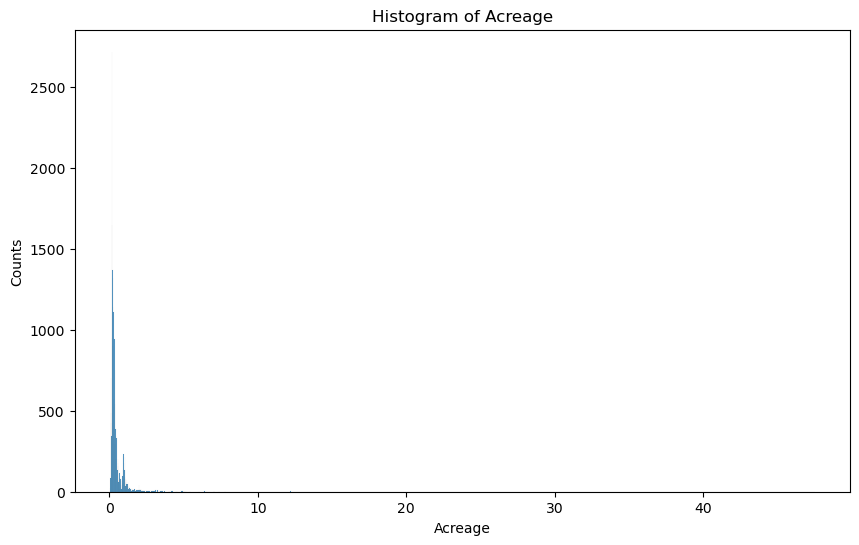

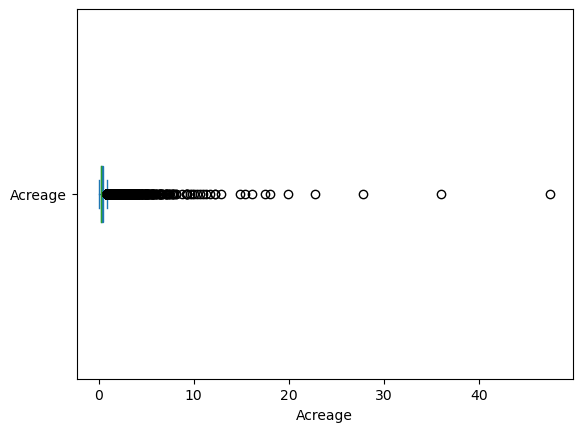

LandValue:


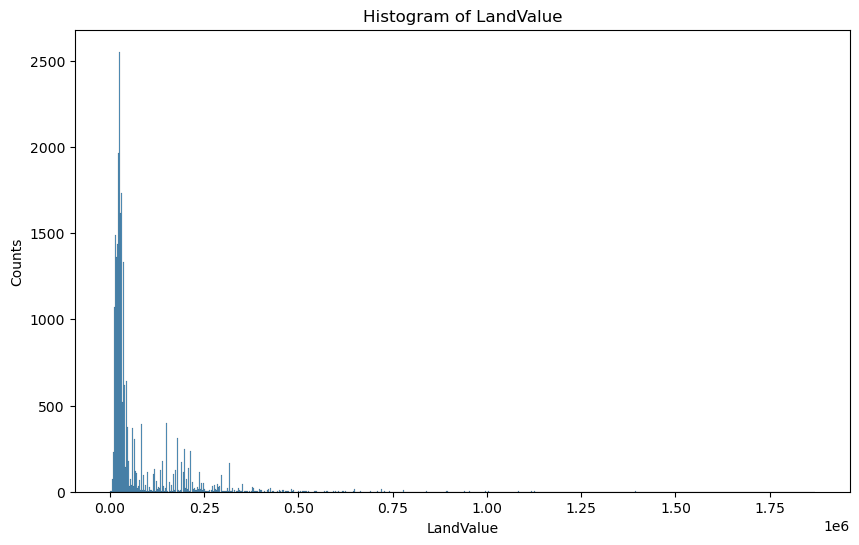

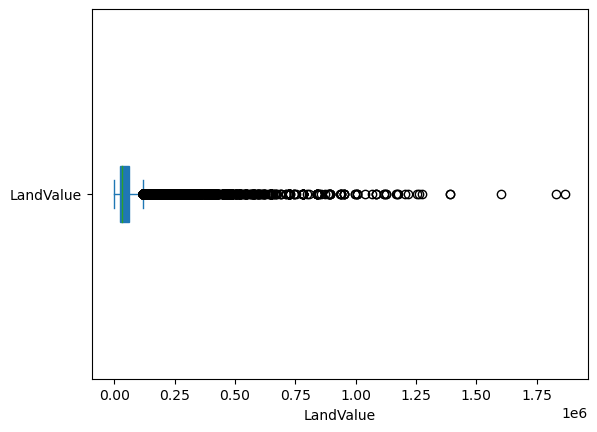

BuildingValue:


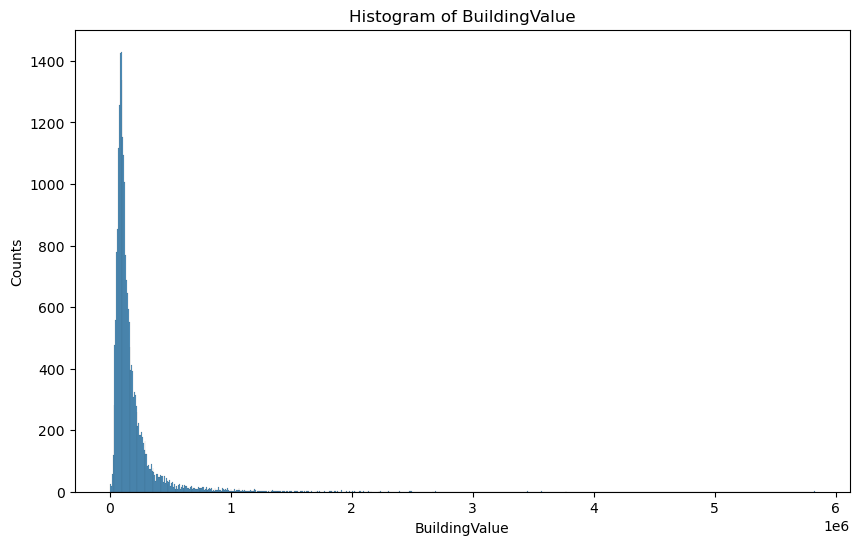

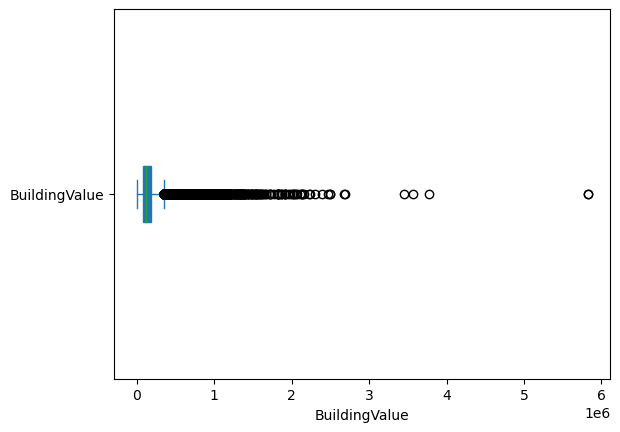

TotalValue:


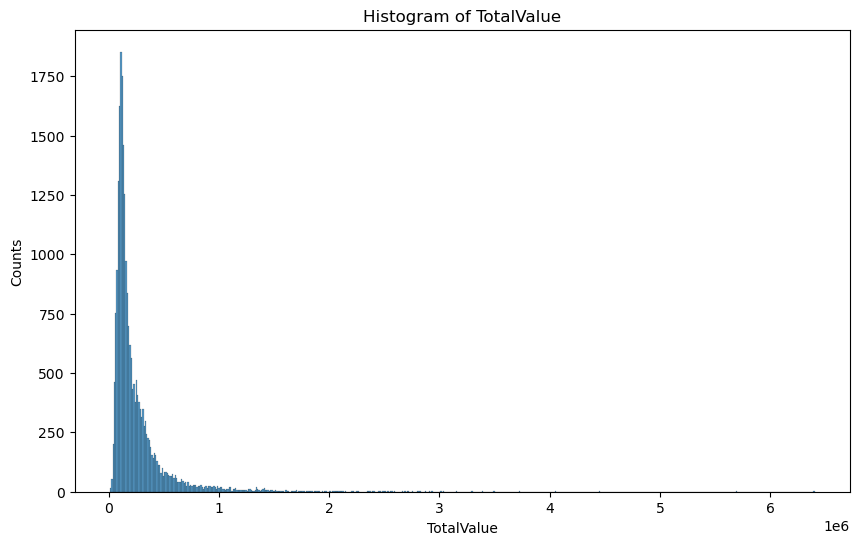

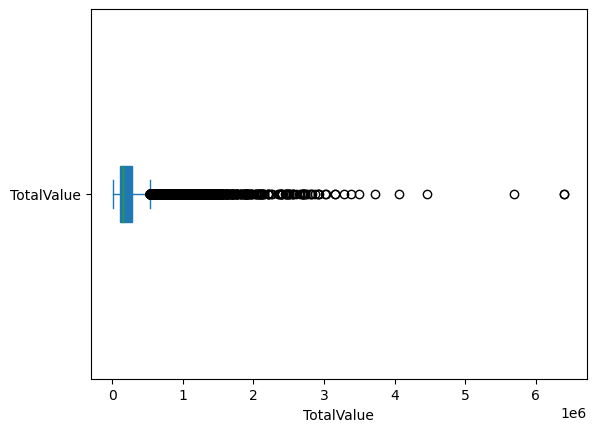

YearBuilt:


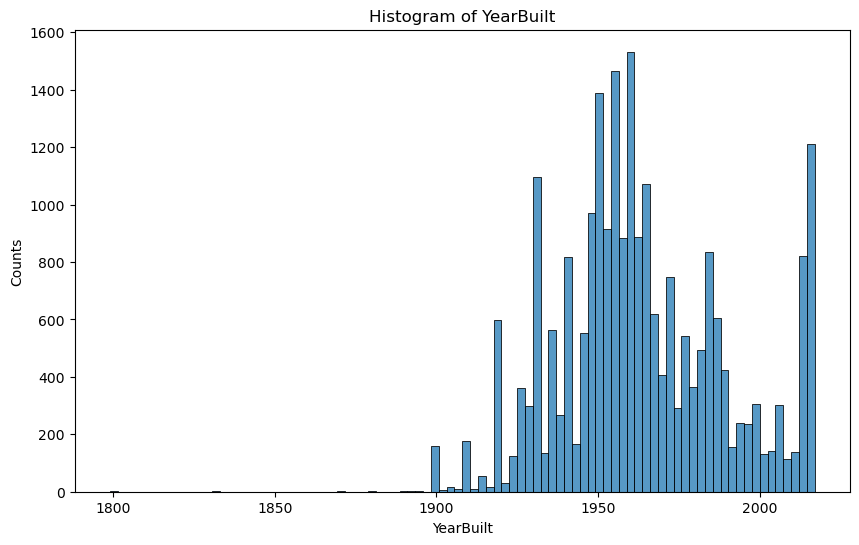

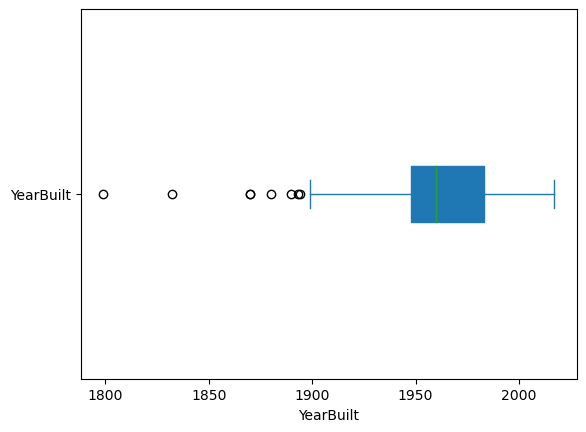

Bedrooms:


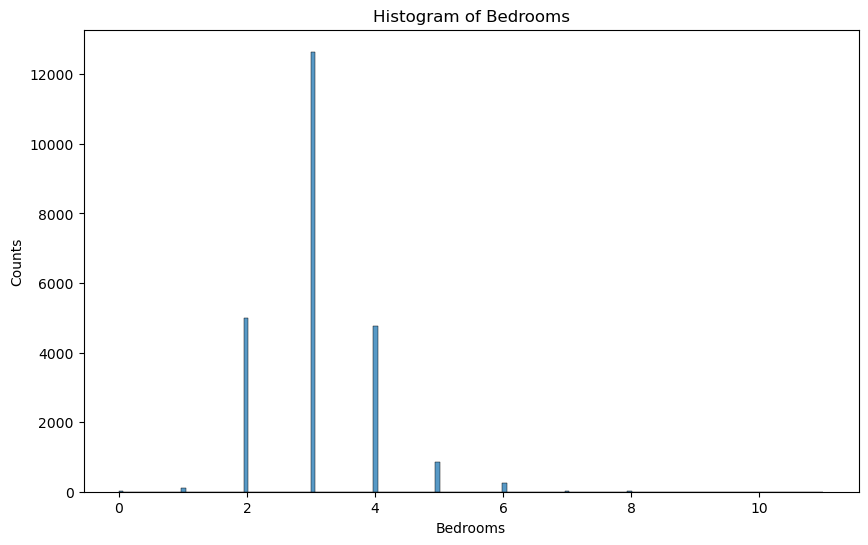

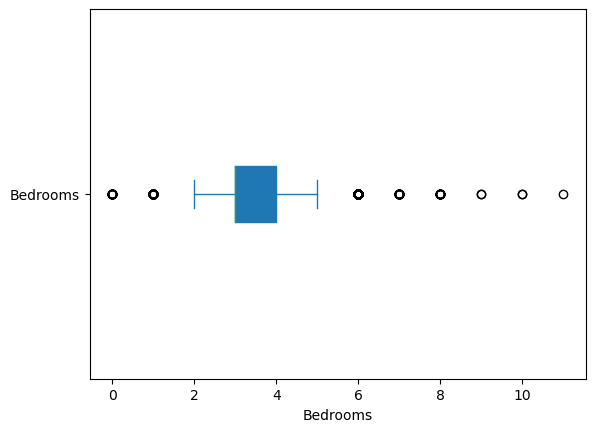

FullBath:


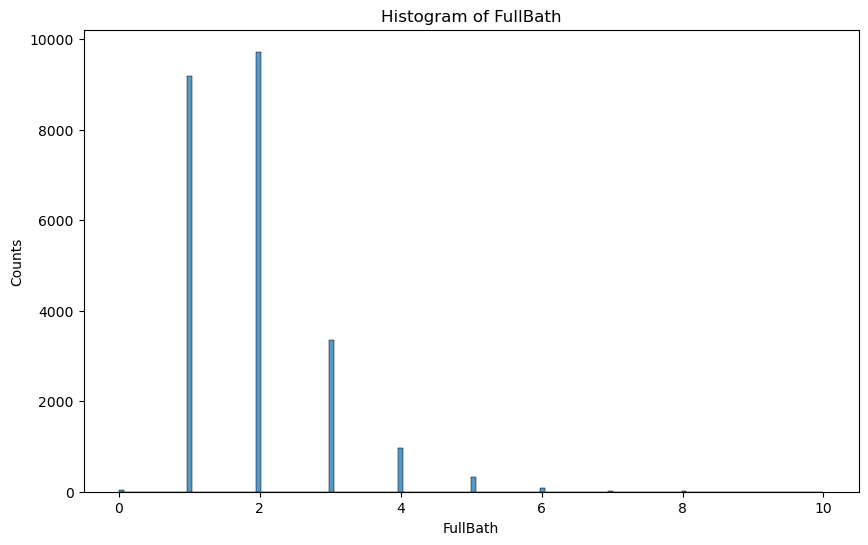

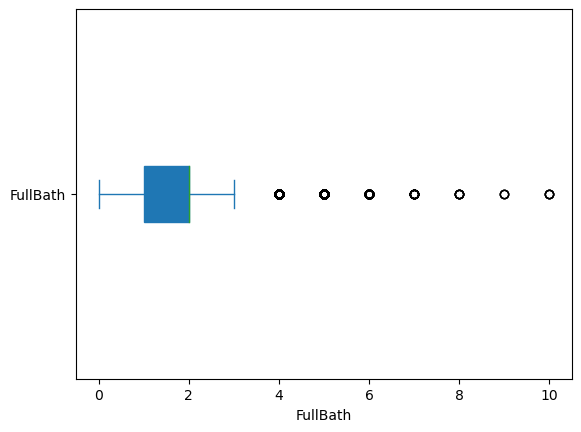

HalfBath:


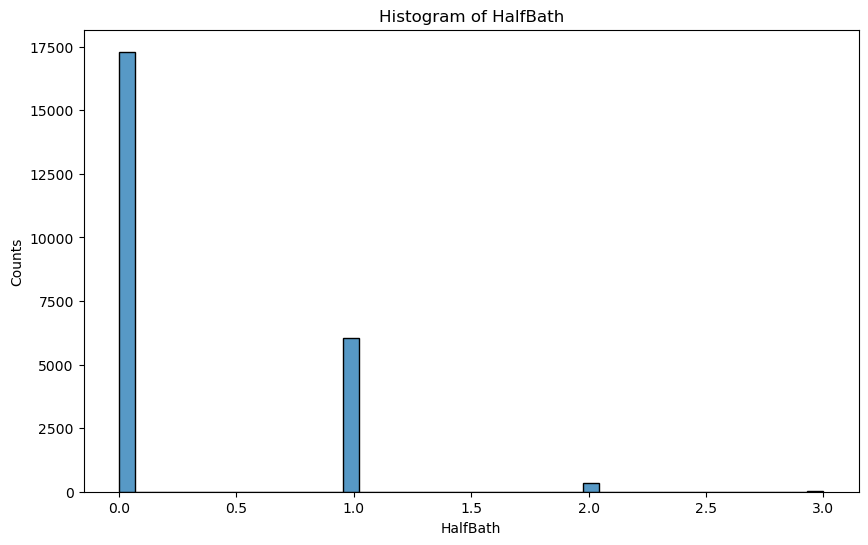

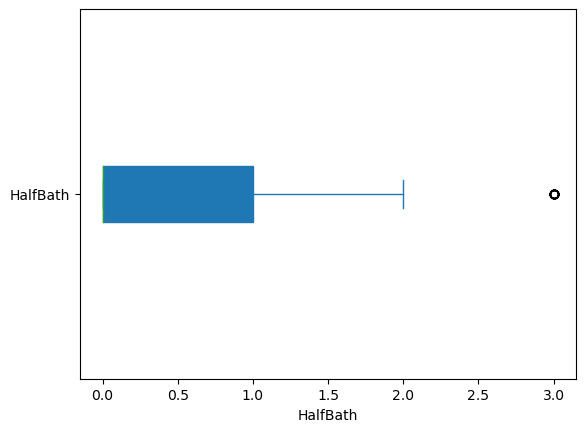

SalePrice:


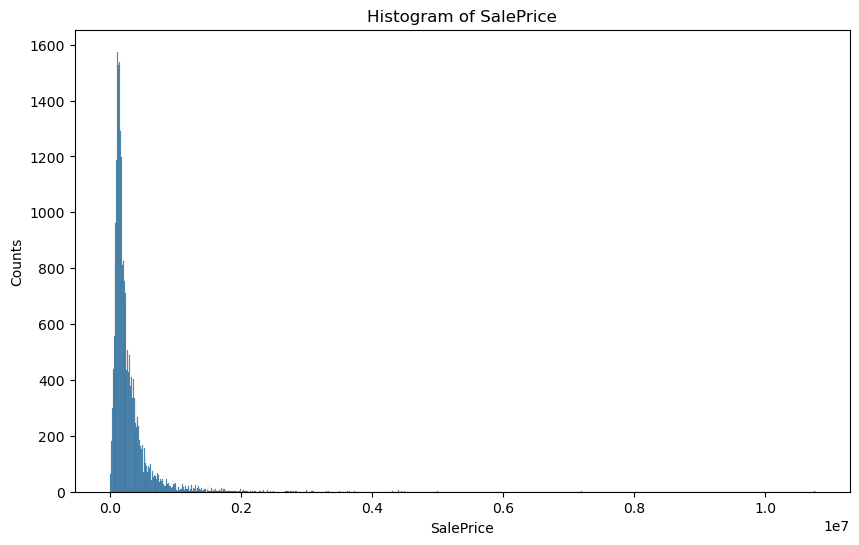

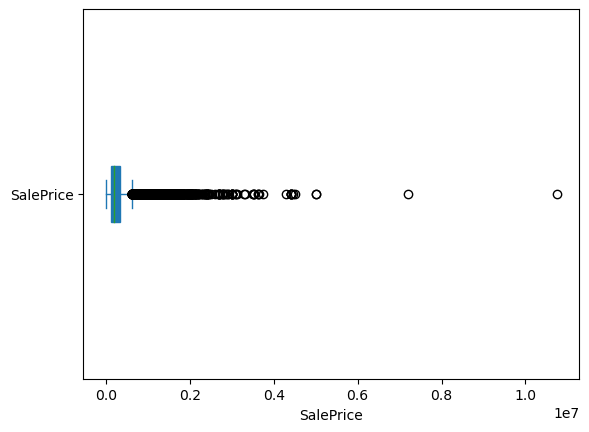

In [60]:
##Lets visualize the continuous variables

for i in continuous:
    print(i+":")
    plt.style.use('default')
    plt.figure(figsize=(10,6))
    sns.histplot(data[i])
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt.title('Histogram of '+i)
    plt.show()
    data[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

### Treating the outliers

In [61]:
iqr=iqr

Acreage:


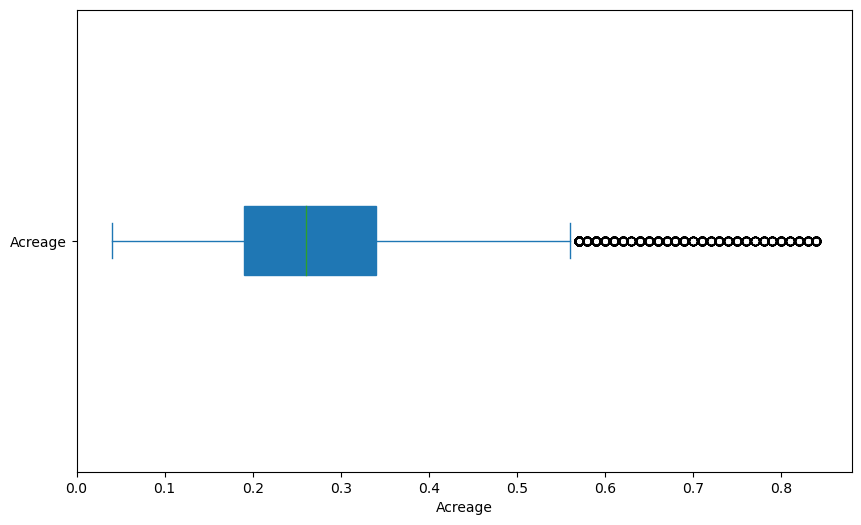

Left Limit:-0.03500000000000003
Right Limit:0.5650000000000001
iqr:0.15000000000000002
if left outlier type 'left' else 'right' else 'both' if no outliers then type:right
by what number do you want to replace0.55


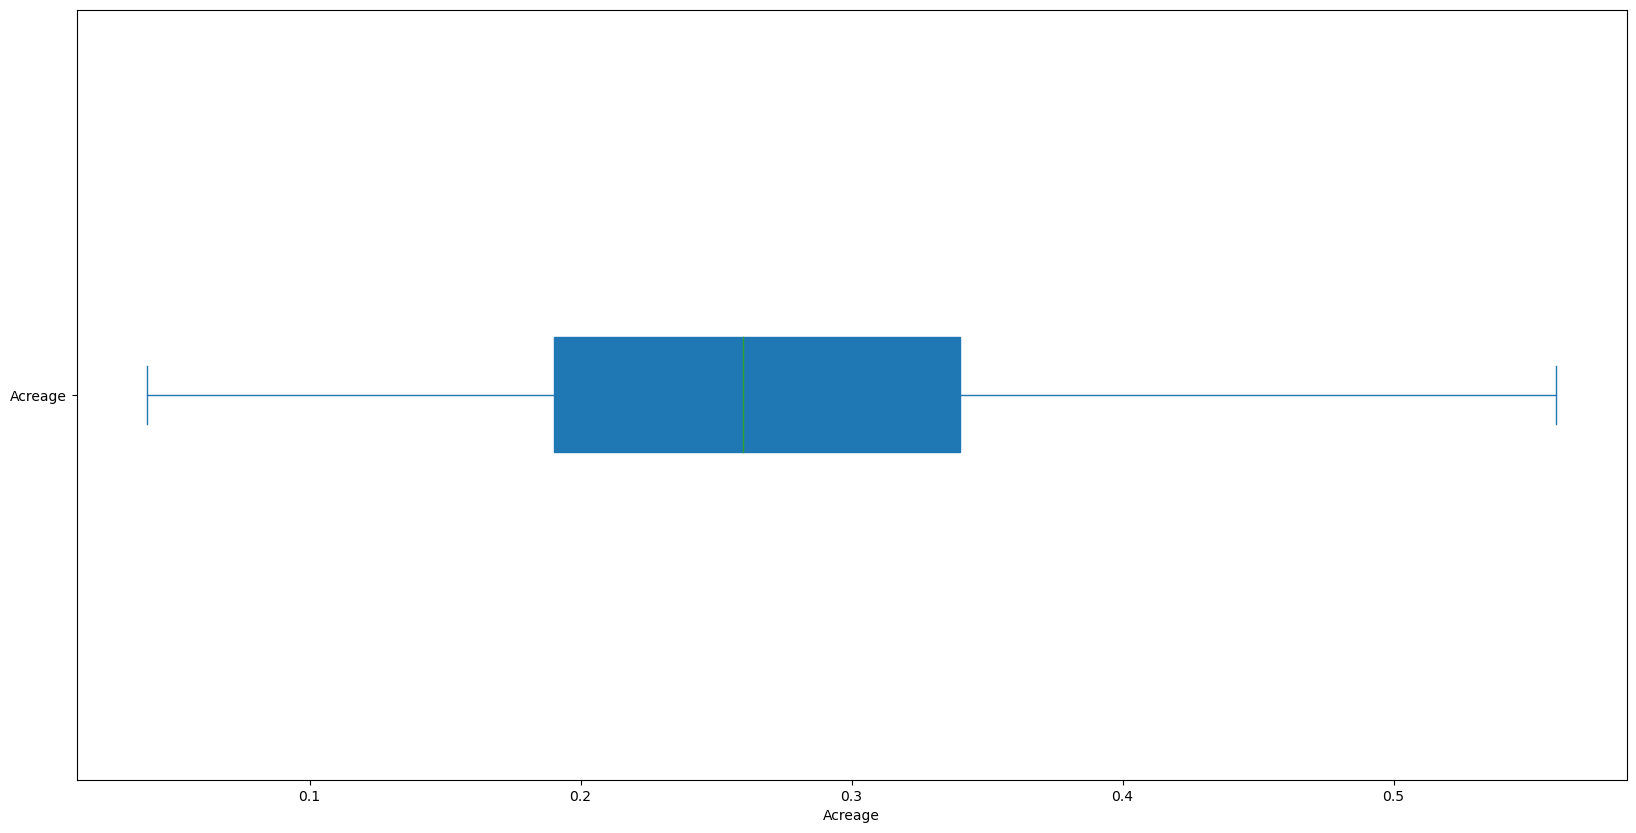

LandValue:


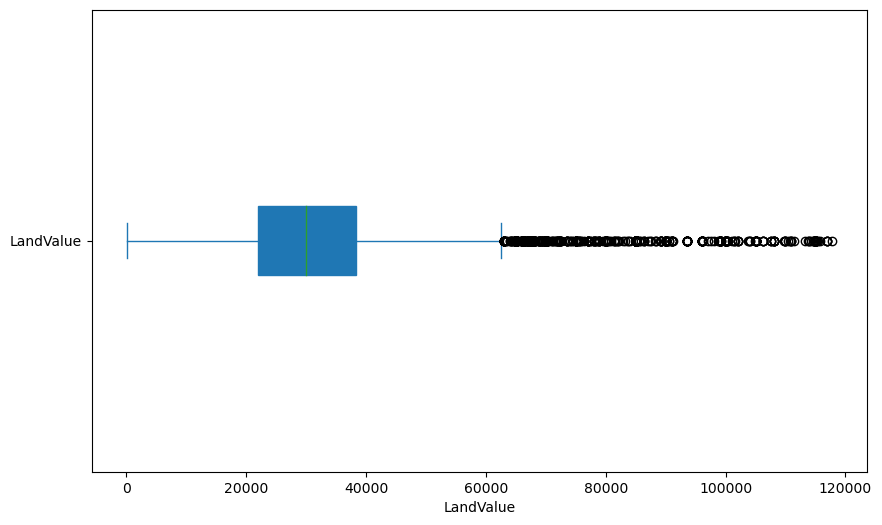

Left Limit:-2450.0
Right Limit:62750.0
iqr:16300.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:right
by what number do you want to replace62000


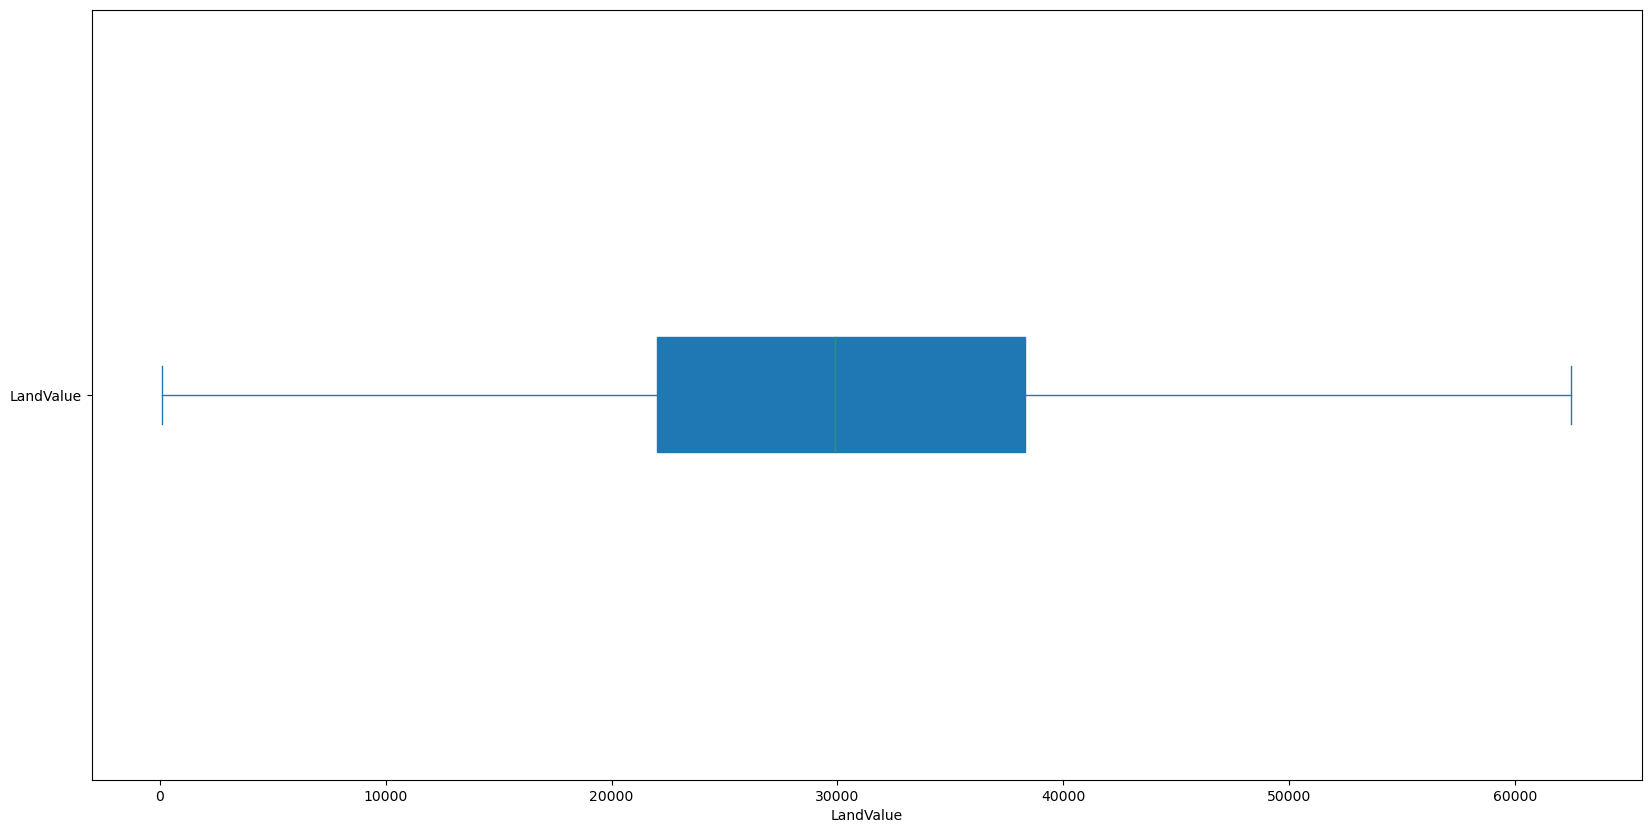

BuildingValue:


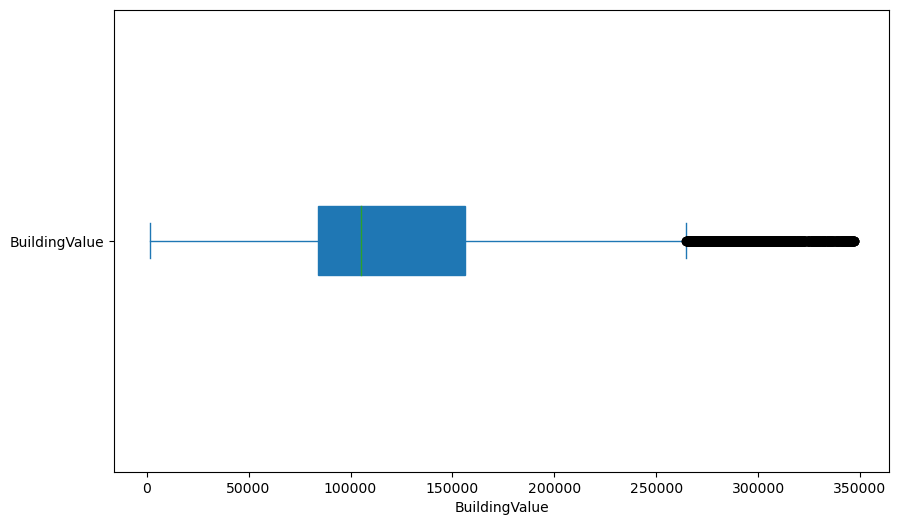

Left Limit:-24550.0
Right Limit:264650.0
iqr:72300.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:right
by what number do you want to replace255000


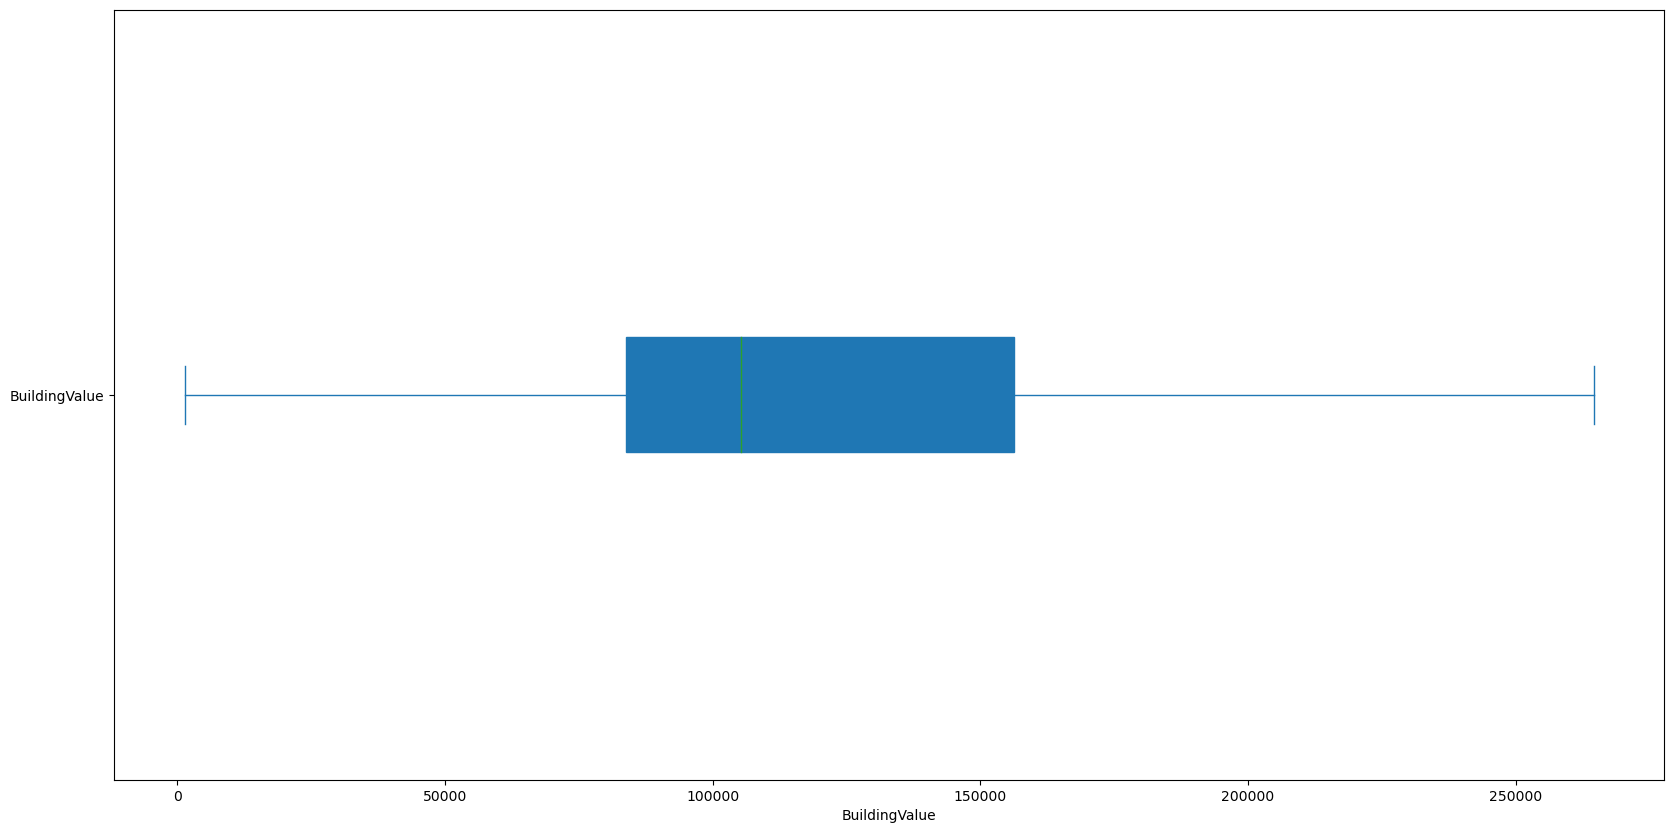

TotalValue:


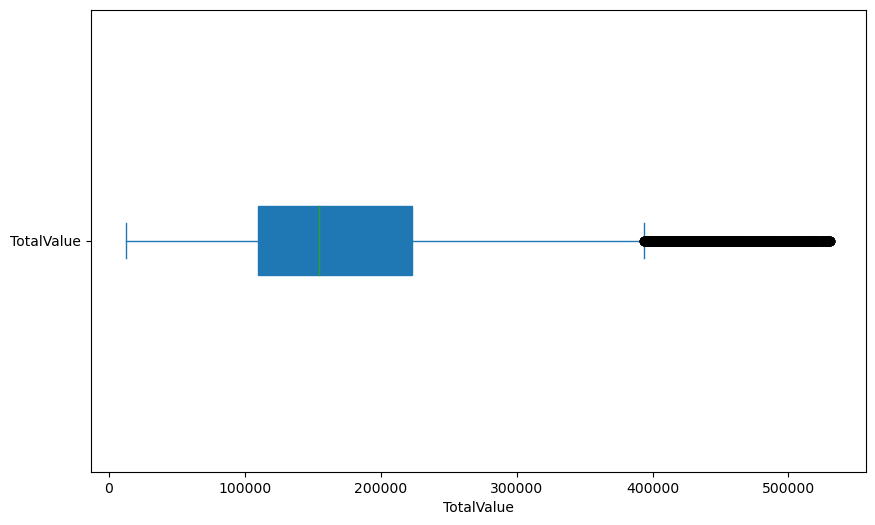

Left Limit:-60450.0
Right Limit:393550.0
iqr:113500.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:right
by what number do you want to replace420000


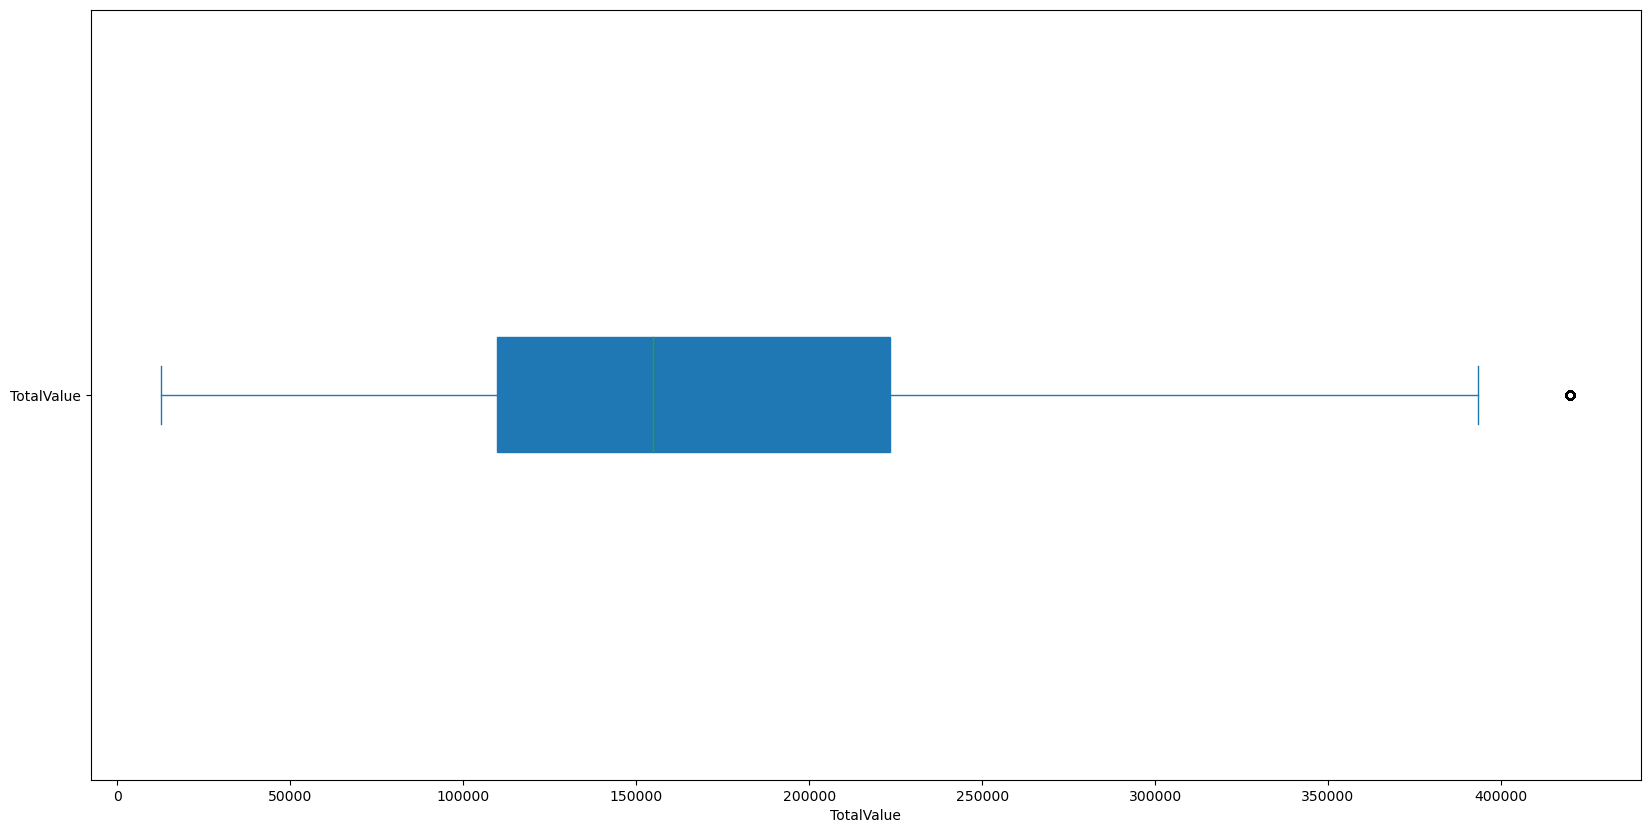

YearBuilt:


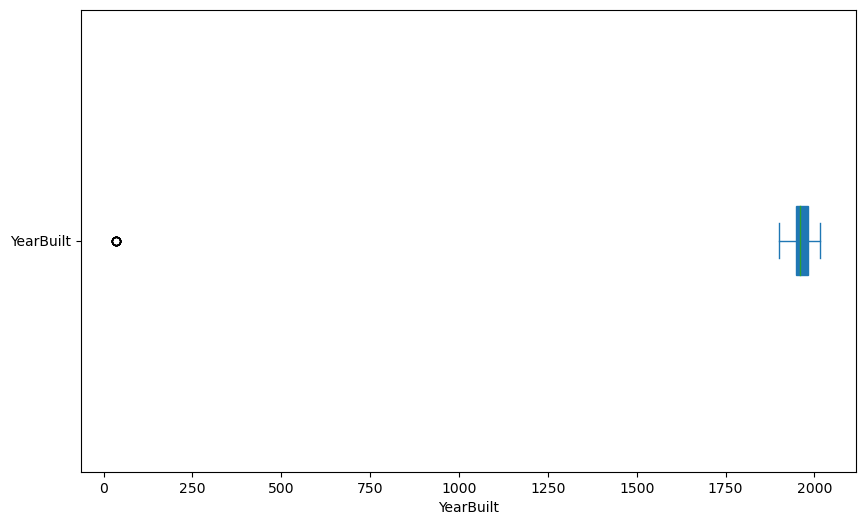

Left Limit:1895.5
Right Limit:2035.5
iqr:35.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:left
by what number do you want to replace35


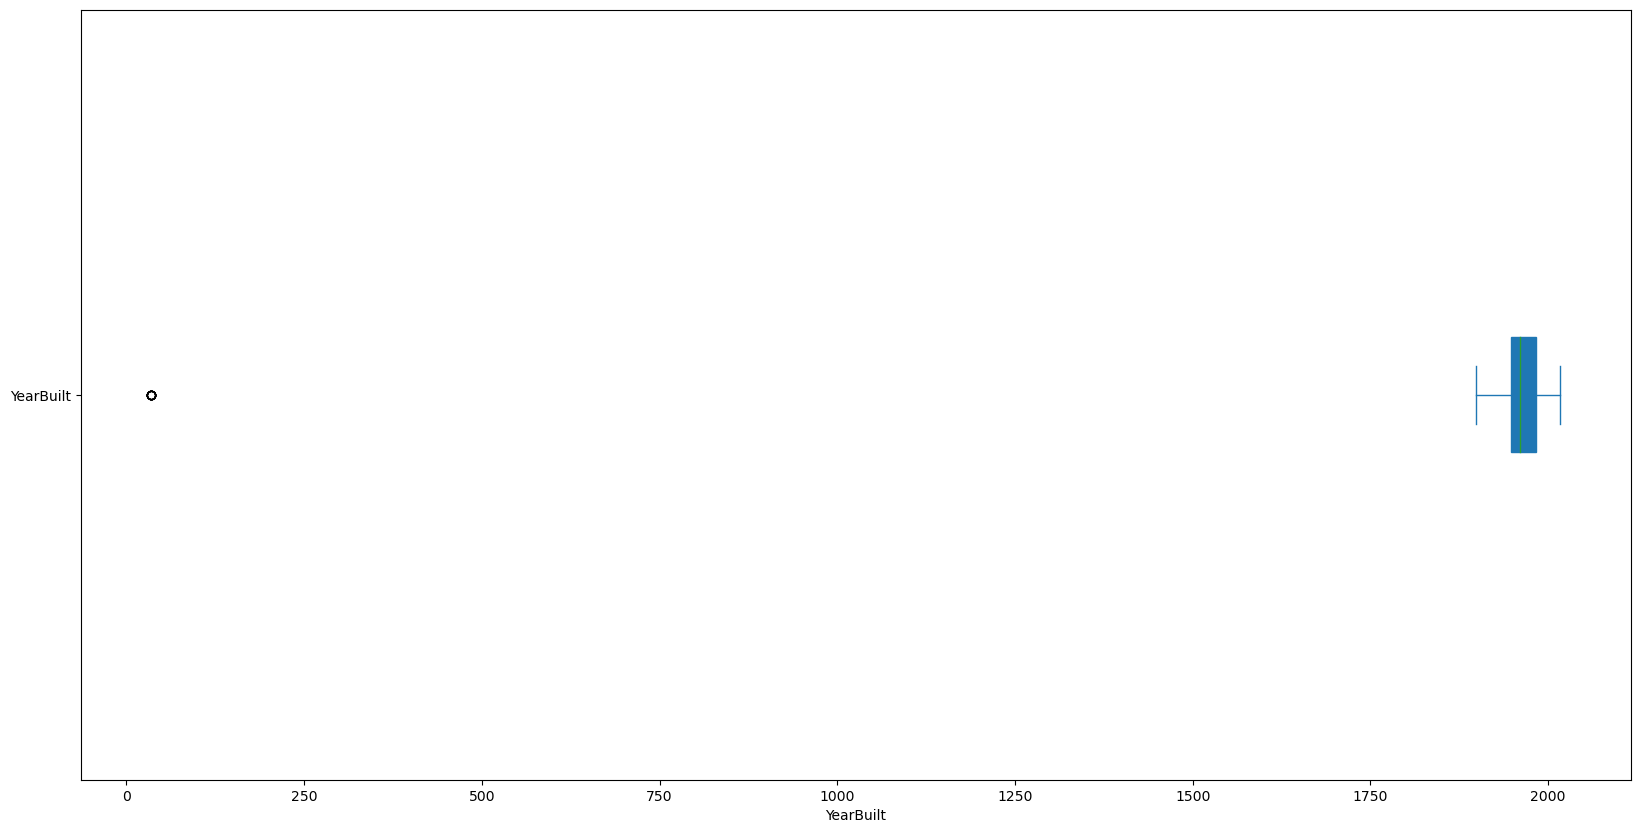

Bedrooms:


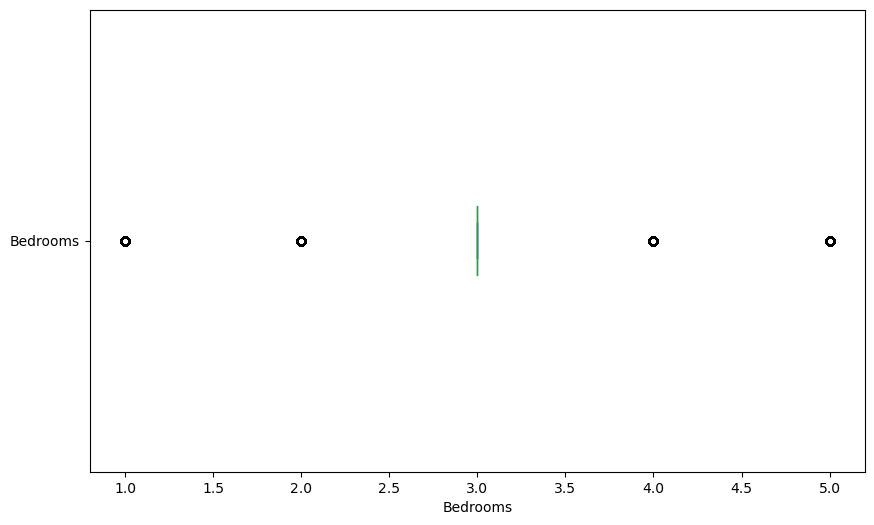

Left Limit:3.0
Right Limit:3.0
iqr:0.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:no


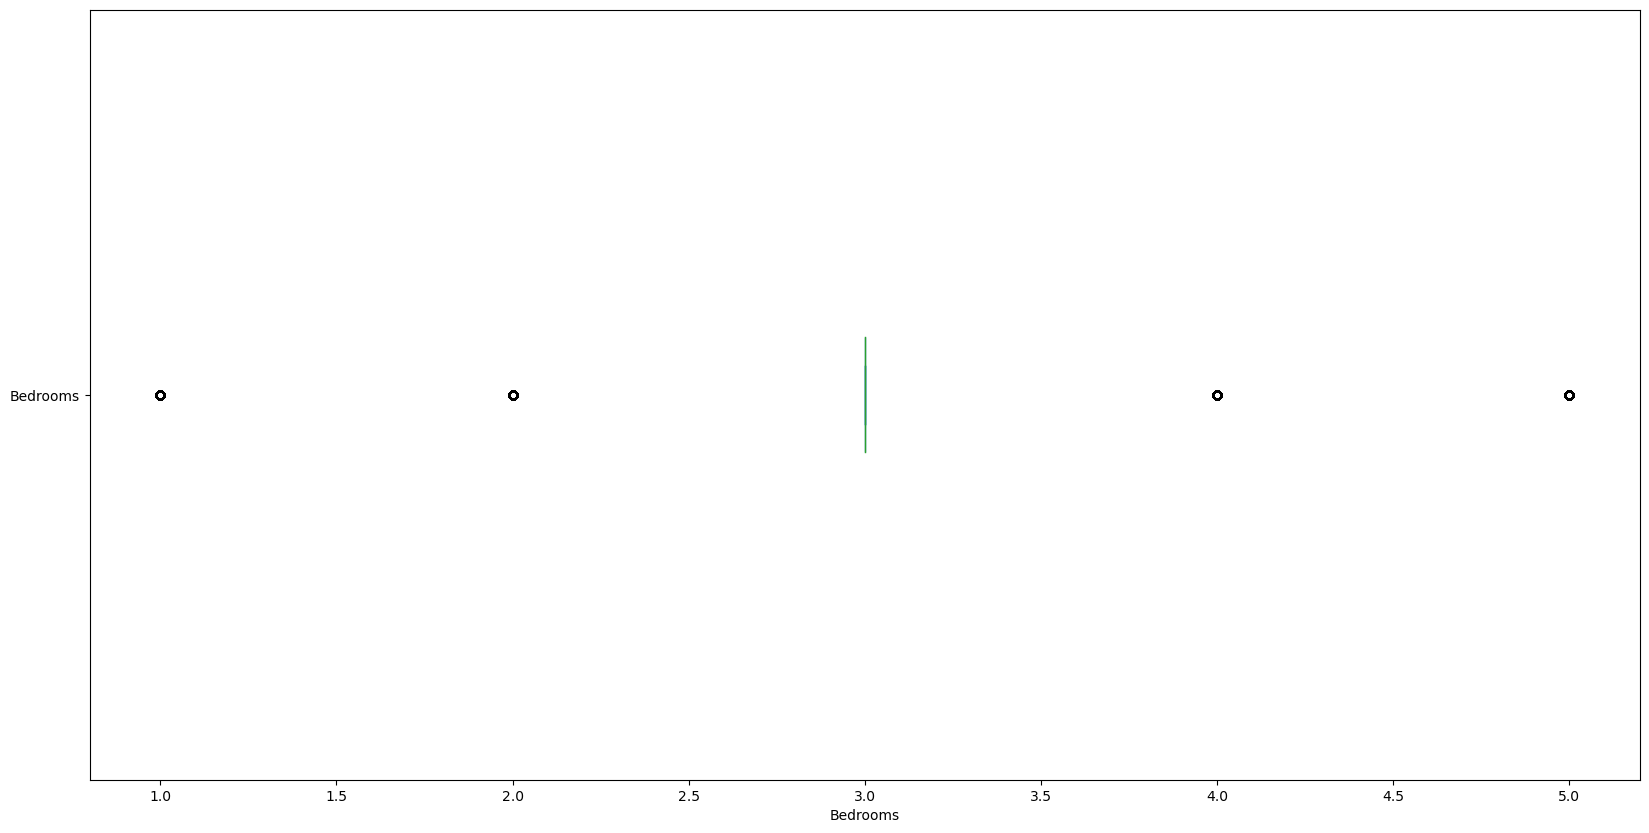

FullBath:


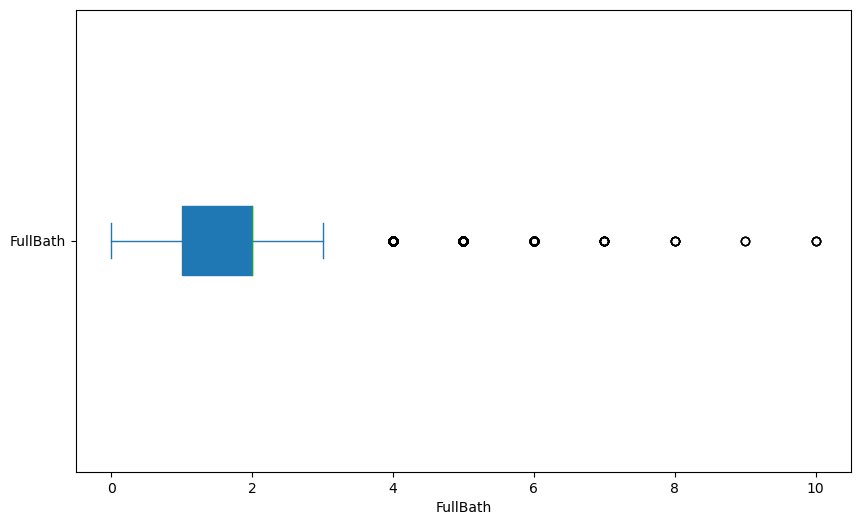

Left Limit:-0.5
Right Limit:3.5
iqr:1.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:right
by what number do you want to replace4


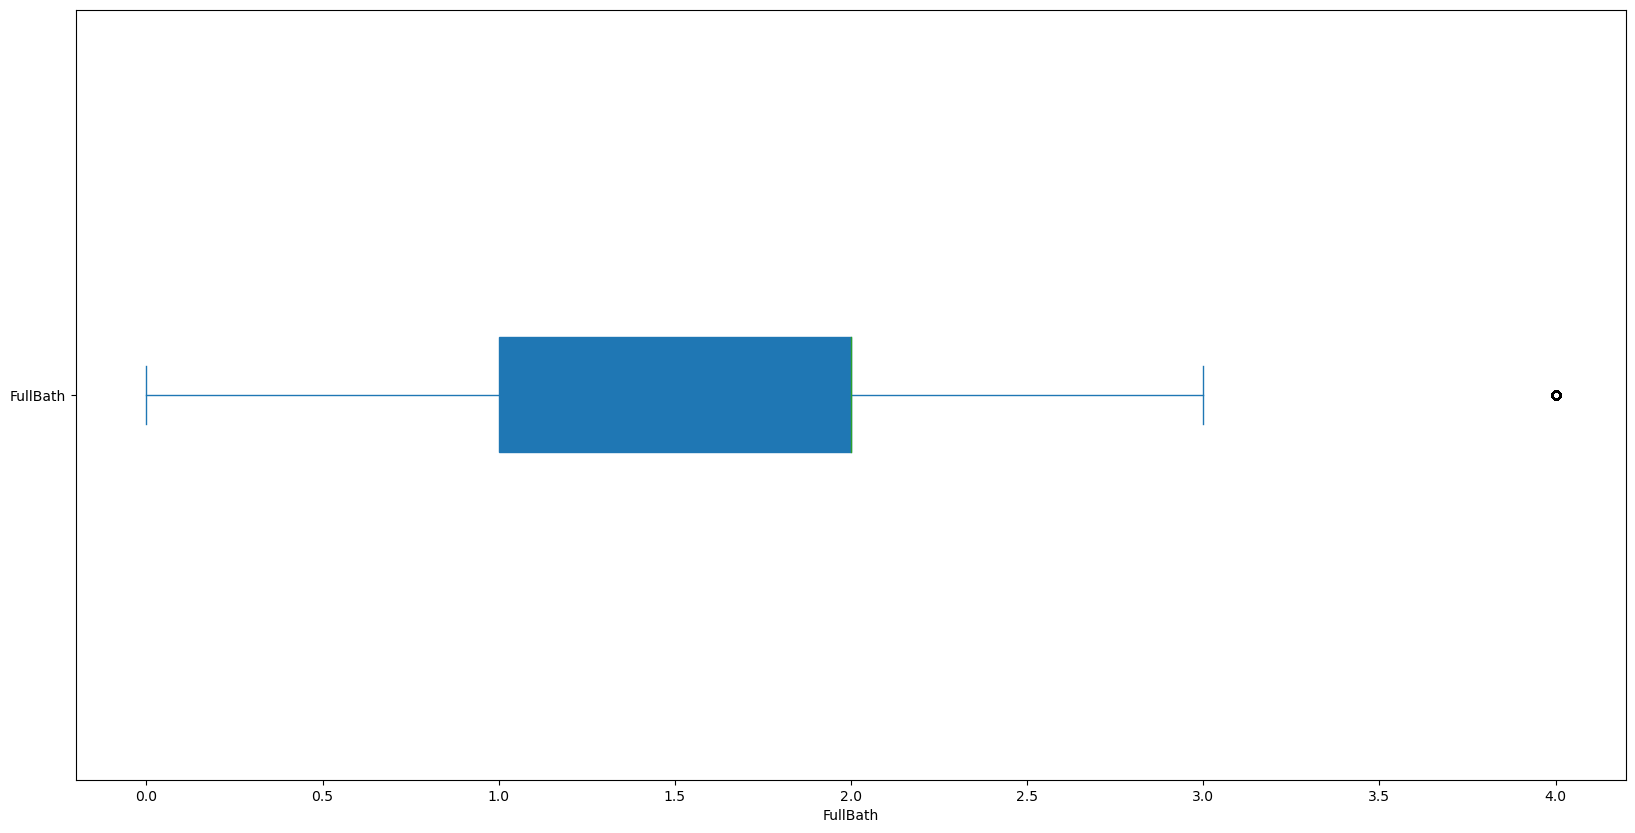

HalfBath:


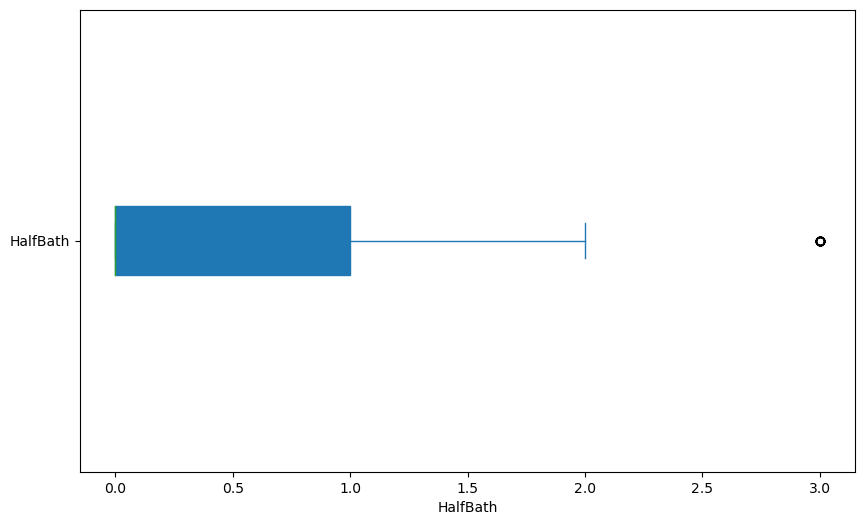

Left Limit:-1.5
Right Limit:2.5
iqr:1.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:no


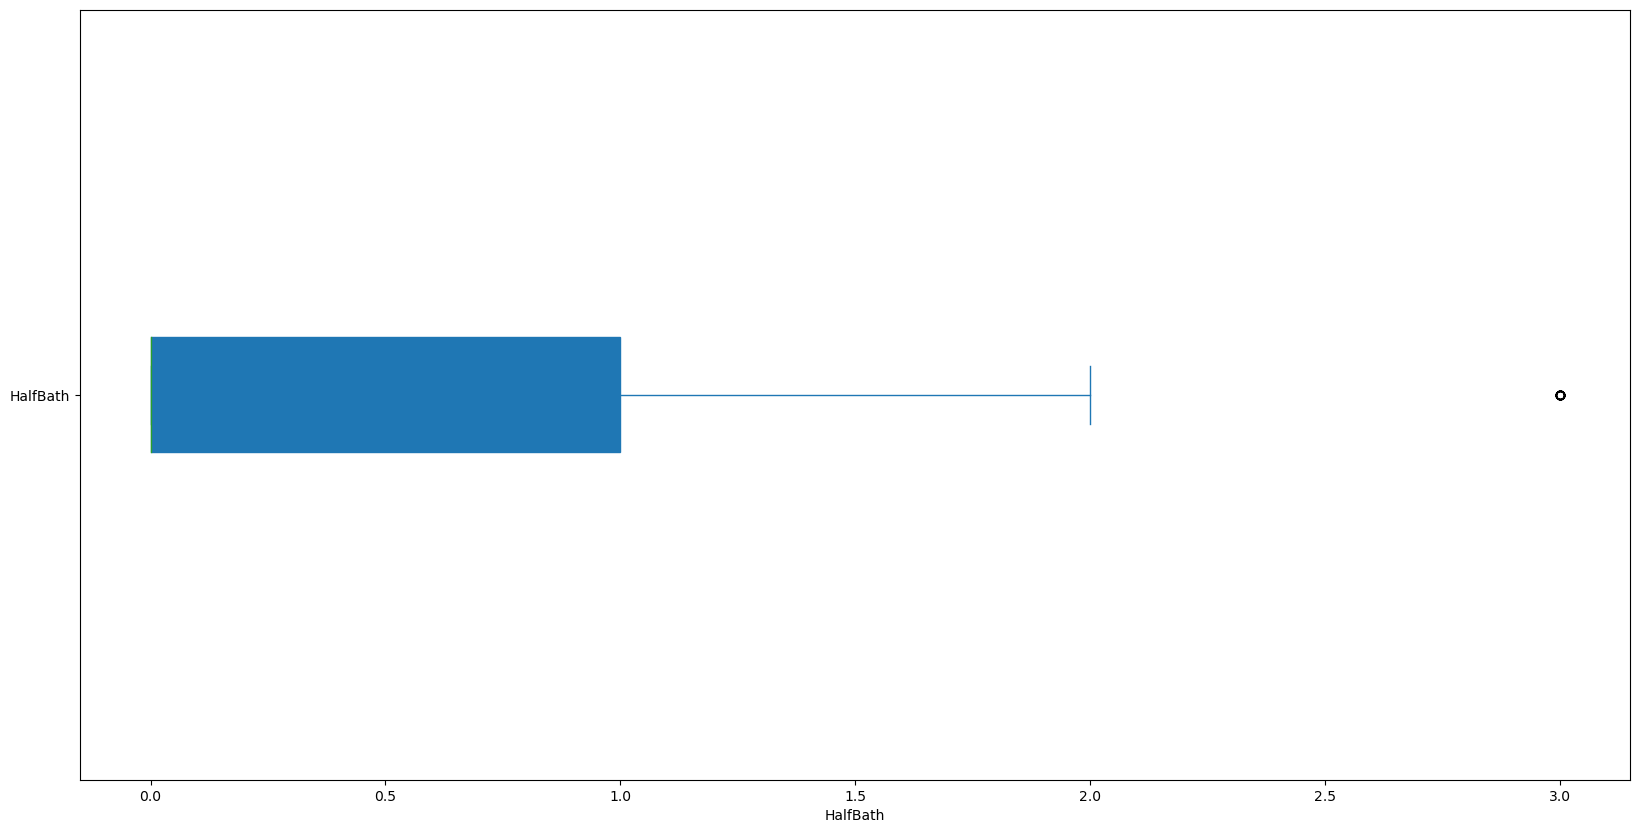

SalePrice:


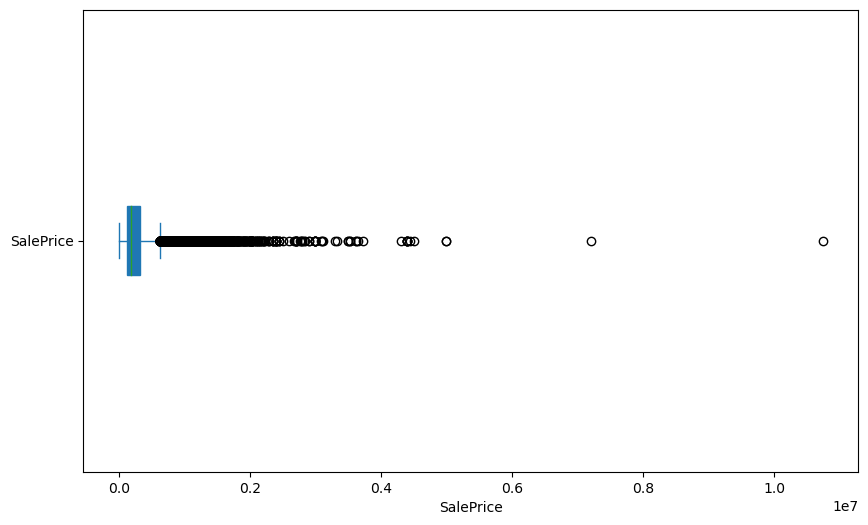

Left Limit:-174850.0
Right Limit:624750.0
iqr:199900.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:right
by what number do you want to replace200000


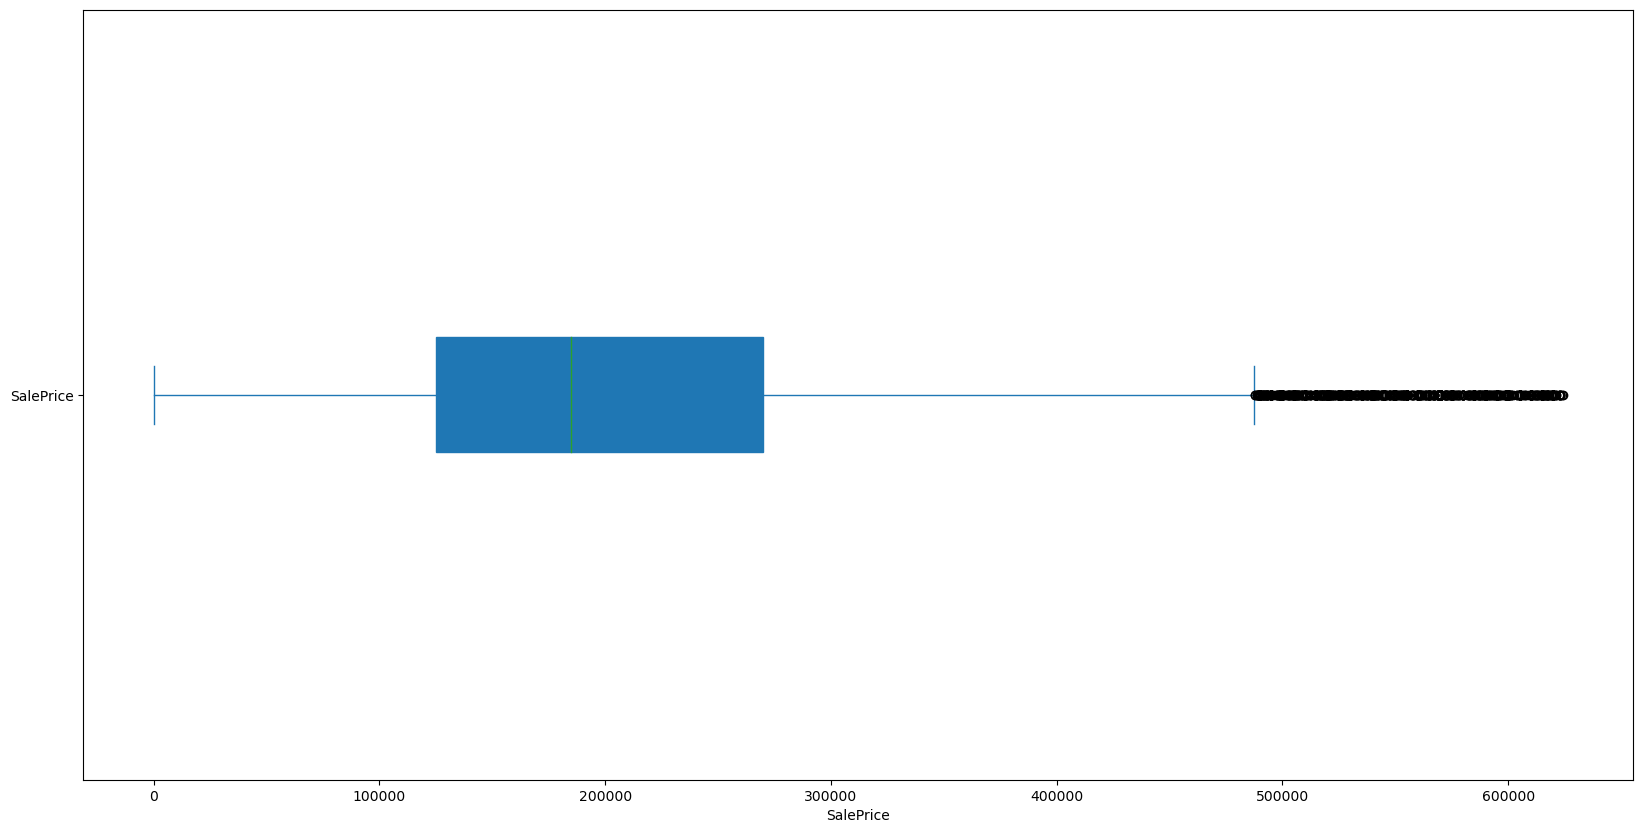

In [66]:
for i in continuous:
    print(i+":")
    plt.figure(figsize=(10,6))
    data[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr = data[i].describe()['75%']-data[i].describe()['25%']
    right_lim = data[i].quantile(0.75)+1.5*iqr
    left_lim = data[i].quantile(0.25)-1.5*iqr
    print('Left Limit:{}'.format(left_lim))
    print('Right Limit:{}'.format(right_lim))
    print('iqr:{}'.format(iqr))
    
    a=input("if left outlier type 'left' else 'right' else 'both' if no outliers then type:" )
    a=a.lower()
    
    if a=='left':
        lo = float(input('by what number do you want to replace'))
        data[i]=[lo if val<left_lim else val for val in data[i]]
    elif a=='right':
        ro=float(input('by what number do you want to replace'))
        data[i]=[ro if val>right_lim else val for val in data[i]]
    elif a=='both':
        lo = float(input('by what number do you want to replace'))
        
        ro=float(input('by what number do you want to replace'))
        data[i]=[lo if val<left_lim else val for val in data[i]]
        data[i]=[ro if val>right_lim else val for val in data[i]]
        
    elif a =='no':
        pass
    plt.figure(figsize=(20,10))
    data[i].plot.box(vert=False, patch_artist=True)
    plt.xlabel(i)
    plt.show()

Acreage:


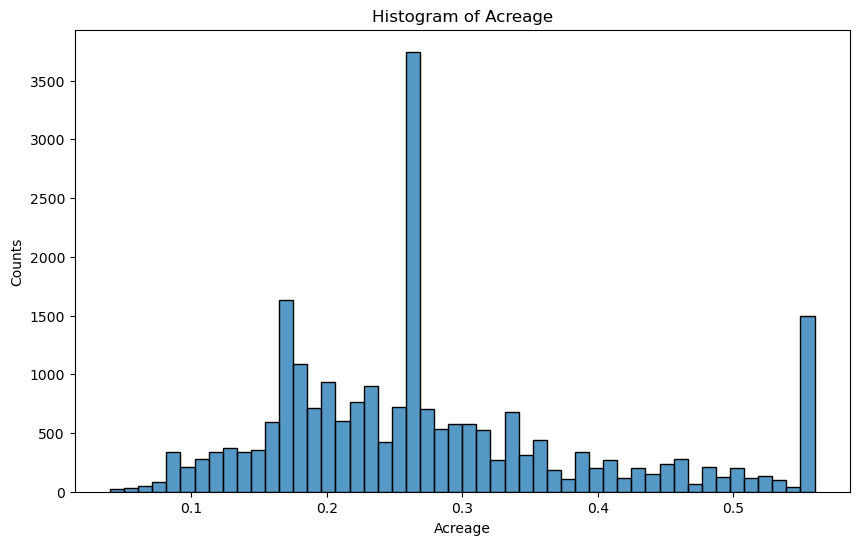

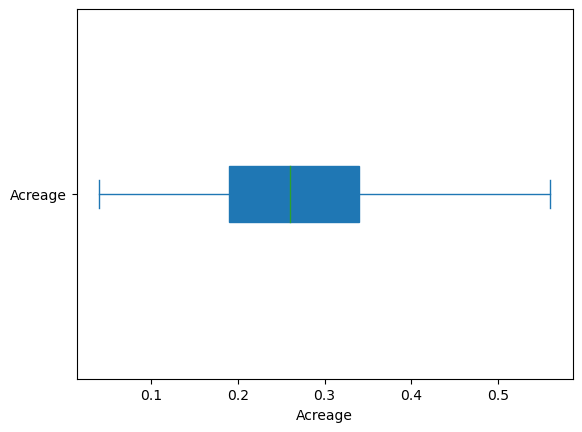

LandValue:


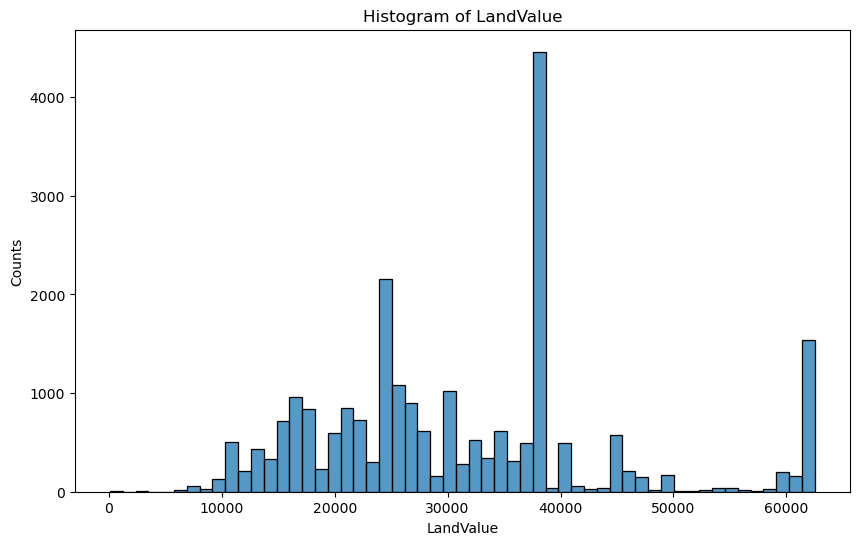

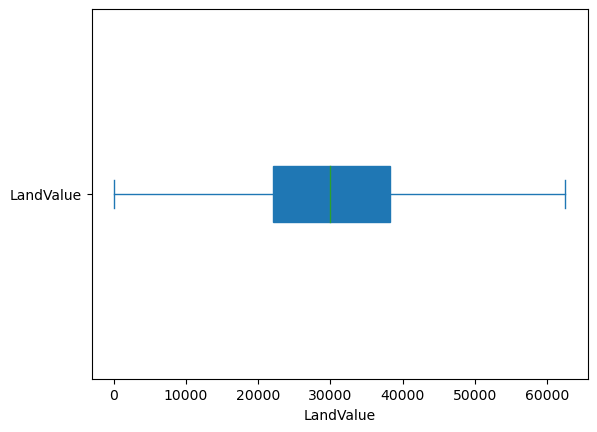

BuildingValue:


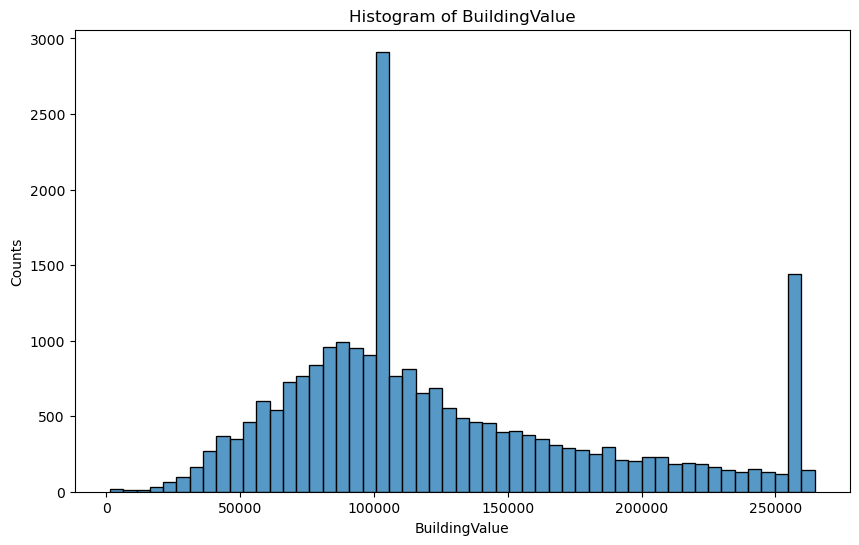

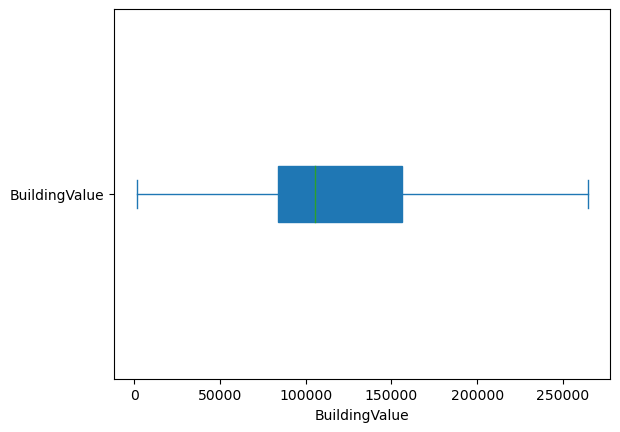

TotalValue:


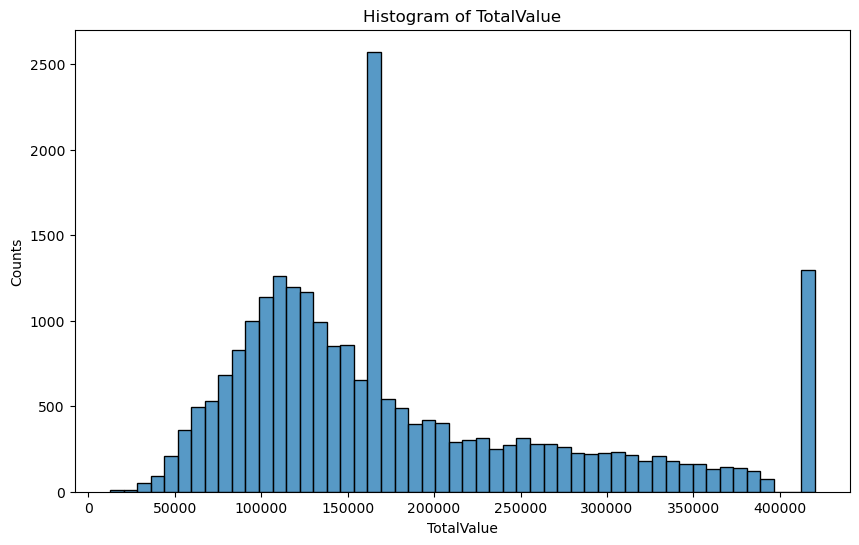

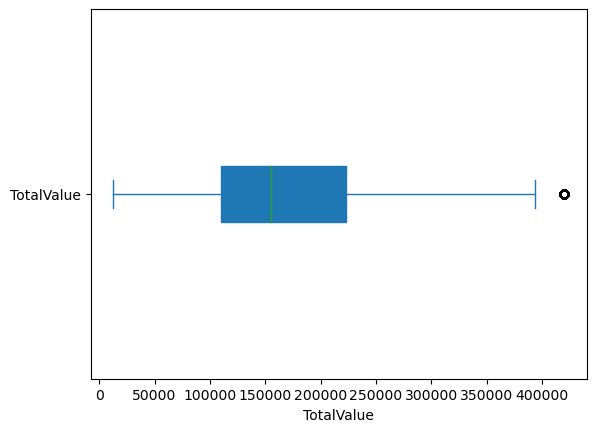

YearBuilt:


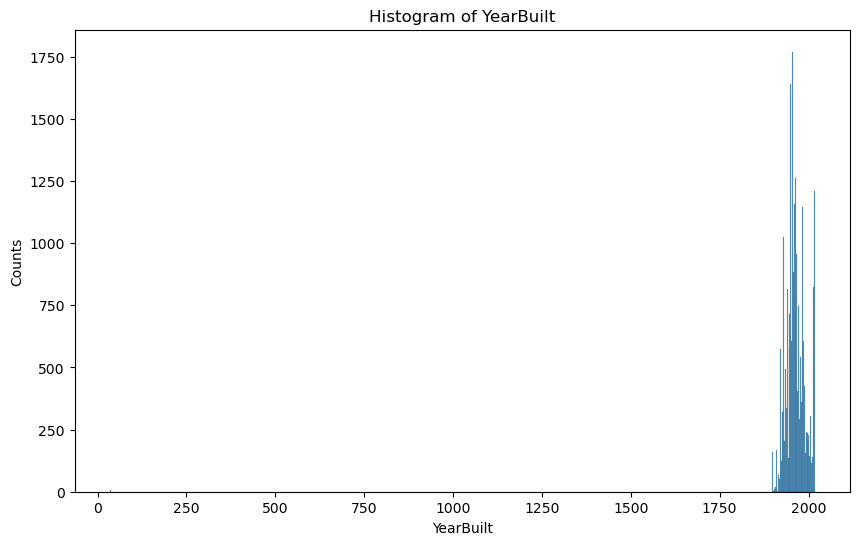

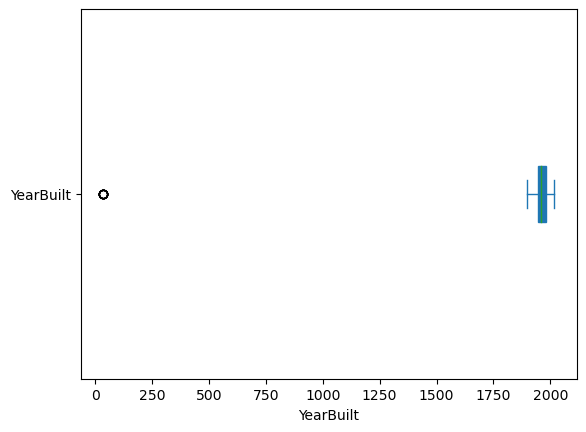

Bedrooms:


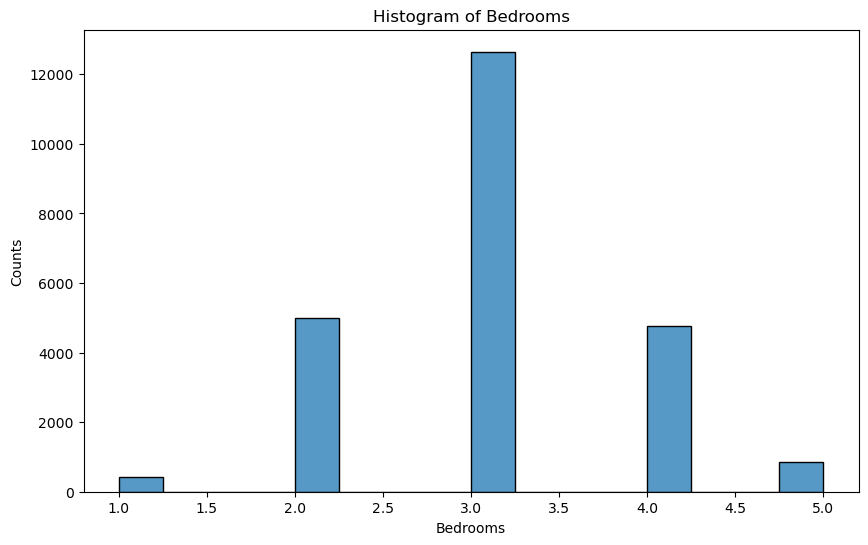

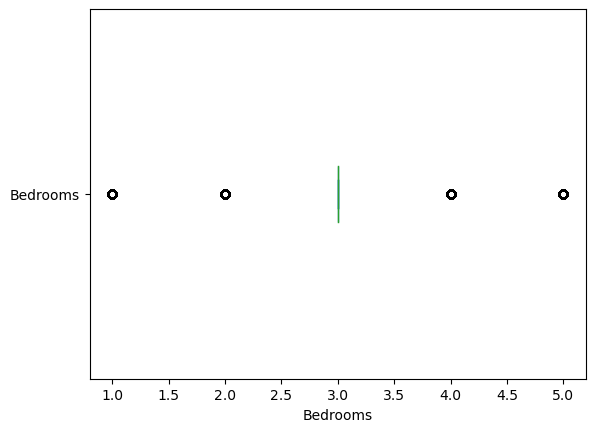

FullBath:


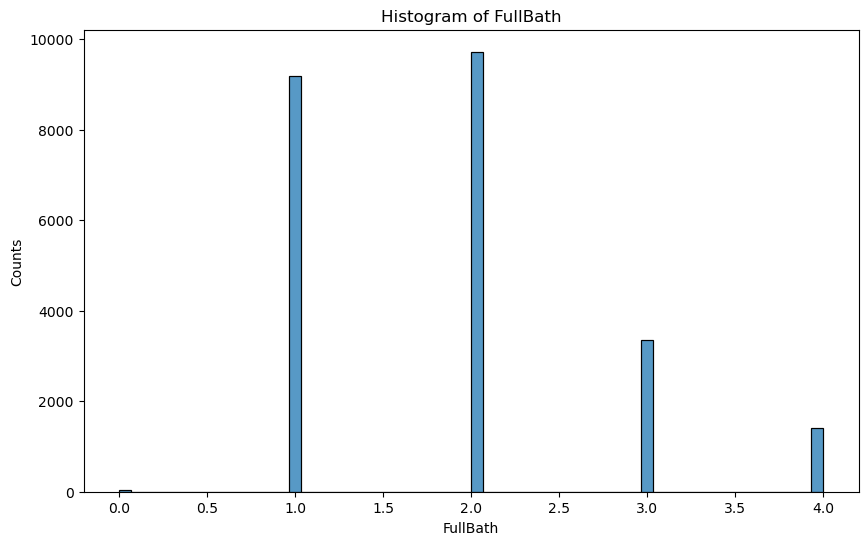

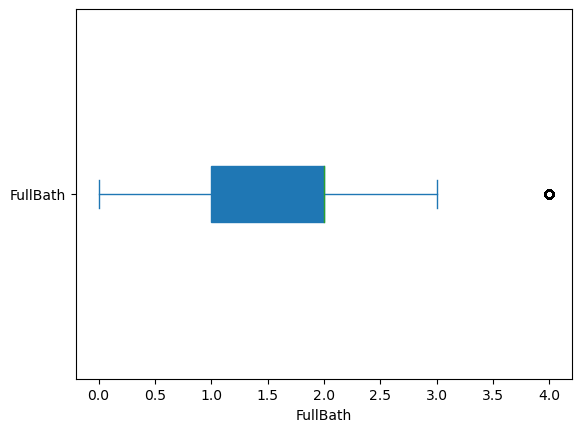

HalfBath:


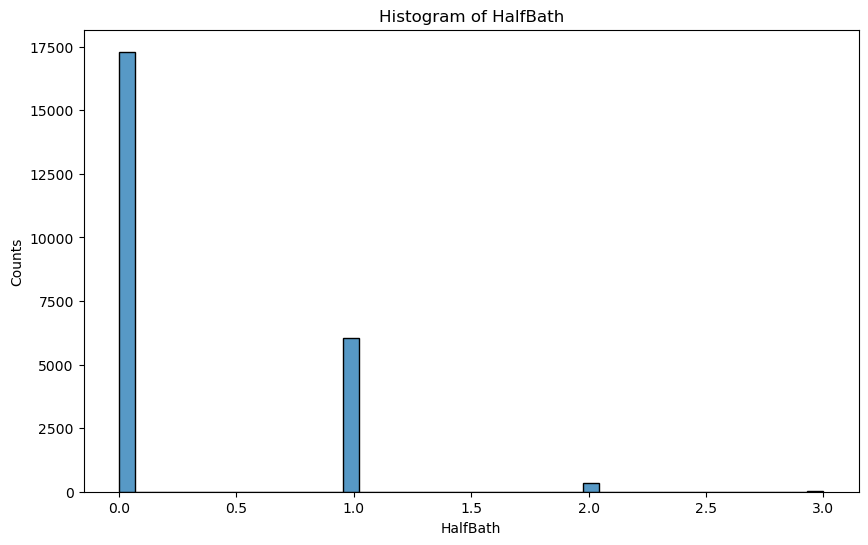

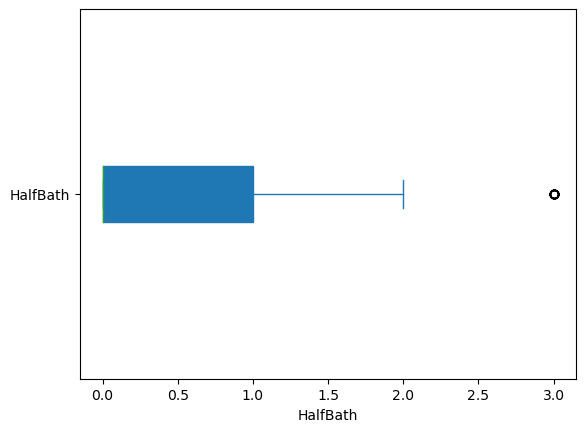

SalePrice:


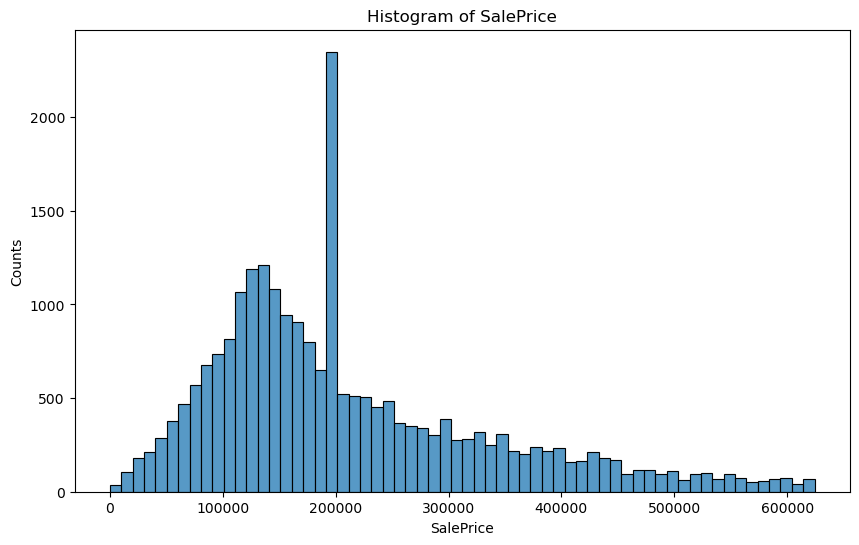

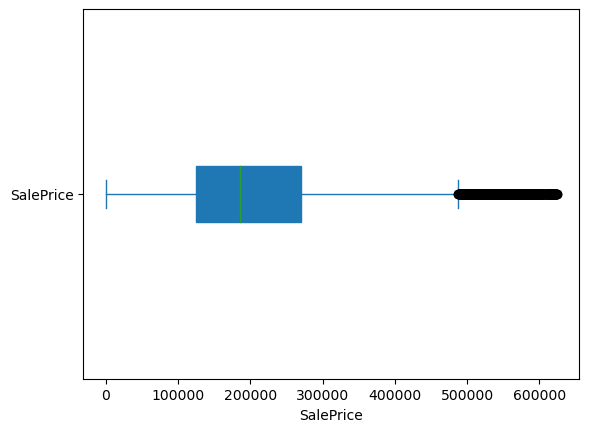

In [67]:
for i in continuous:
    print(i+":")
    plt.style.use('default')
    plt.figure(figsize=(10,6))
    sns.histplot(data[i])
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt.title('Histogram of '+i)
    plt.show()
    data[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

### Correlation Analysis on the Continuous variables

In [56]:
from scipy.stats import stats

In [64]:
for i in continuous:
    
    corr_coef,p_val = stats.pearsonr(data[i],data.SalePrice)
    
    if p_val<0.05:
        if corr_coef>0:
            print('\nThe '+i+' is positively correlated with the Price')
            print('p_val={}'.format(p_val))
            print('corr_coef={}'.format(corr_coef))
            print(Fore.GREEN +"'{}' is a Good Predictor".format(i))
        elif corr_coef<0:
            print('\nThe '+i+' is negatively correlated with the Price')
            print('p_val={}'.format(p_val))
            print('corr_coef={}'.format(corr_coef))
            print(Fore.RED + "'{}' is a bad predictor'\n".format(i))
        else:      
            print('\nThe '+i+' is not correlated with the Price')
            print('p_val={}'.format(p_val))
            print('corr_coef={}'.format(corr_coef))
    else:
        print('\nThe correlation is not statistically correlated')


The Acreage is positively correlated with the Price
p_val=4.7004306686207064e-35
corr_coef=0.08010731469994362
'Acreage' is a Good Predictor

The LandValue is positively correlated with the Price
p_val=0.0
corr_coef=0.28519365789105794
'LandValue' is a Good Predictor

The BuildingValue is positively correlated with the Price
p_val=9.633279379519918e-278
corr_coef=0.2282433811714129
'BuildingValue' is a Good Predictor

The TotalValue is positively correlated with the Price
p_val=0.0
corr_coef=0.3218044235457089
'TotalValue' is a Good Predictor

The correlation is not statistically correlated

The Bedrooms is positively correlated with the Price
p_val=0.0
corr_coef=0.2899374284186575
'Bedrooms' is a Good Predictor

The FullBath is positively correlated with the Price
p_val=0.0
corr_coef=0.5527115318993419
'FullBath' is a Good Predictor

The HalfBath is positively correlated with the Price
p_val=0.0
corr_coef=0.2538003295783493
'HalfBath' is a Good Predictor

The SalePrice is positively 

#### Lets visualize the correlation using heatmaps

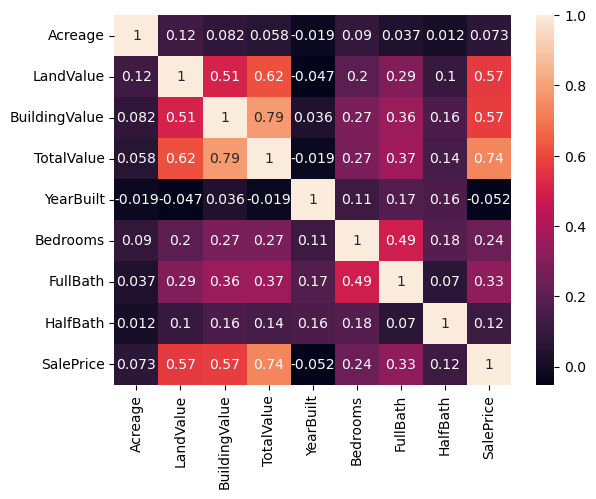

In [68]:
plt.style.use('default')
sns.heatmap(data.corr(),annot=True)
plt.show()